# Library

In [1]:
import pandas as pd
import numpy as np

import copy

from collections import Counter
from multipledispatch import dispatch

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import AllKNN, EditedNearestNeighbours, NearMiss, OneSidedSelection, \
    InstanceHardnessThreshold, NeighbourhoodCleaningRule, TomekLinks, CondensedNearestNeighbour, \
    RepeatedEditedNearestNeighbours

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, scale
from impyute.imputation.cs import fast_knn as knn

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, roc_auc_score, matthews_corrcoef, \
    cohen_kappa_score

sns.set_style('darkgrid')

# Configs

In [2]:
dataset_file = 'source_dataset.csv'

In [3]:
numeric_features = ['AGE', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD'
                    ,'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']
categorical_features = ['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK'
                        , 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A'
                        ,'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07'
                        , 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07'
                        , 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02'
                        , 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'
                        , 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST'
                        , 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST'
                        , 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
                        , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04'
                        , 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
                        , 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03'
                        , 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
                        , 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10'
                        , 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04'
                        , 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07'
                        , 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
                        , 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01'
                        , 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05'
                        , 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08'
                        ,'GIPO_K', 'GIPER_NA', 'TIME_B_S', 'R_AB_1_n'
                        , 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB'
                        , 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n'
                        , 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n'
                        , 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n'
                        , 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

In [4]:
binary_features = ['SEX', 'IBS_NASL', 'SIM_GIPERT','nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04'
                   , 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07'
                   , 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02'
                   , 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'
                   , 'zab_leg_04', 'zab_leg_06', 'O_L_POST', 'K_SH_POST'
                   , 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST','IM_PG_P'
                   , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04'
                   , 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
                   , 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03'
                   , 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
                   , 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10'
                   , 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04'
                   , 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07'
                   , 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
                   , 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01'
                   , 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05'
                   , 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08'
                   ,'GIPO_K', 'GIPER_NA', 'NA_KB', 'NOT_NA_KB', 'LID_KB'
                   , 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n'
                   , 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

In [5]:
target_columns = ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 
                 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN'
                 , 'REC_IM', 'P_IM_STEN', 'LET_IS', 'DEATH']

In [1]:
zero_day = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG'
             ,'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07'
             , 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'
             , 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST'
             , 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
             , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
             , 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08'
             , 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
             , 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01'
             , 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD'
             , 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'NA_KB'
             , 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n'
             , 'TRENT_S_n']

one_day = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG'
             ,'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07'
             , 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'
             , 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST'
             , 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
             , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
             , 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08'
             , 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
             , 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01'
             , 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD'
             , 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'NA_KB'
             , 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n'
             , 'TRENT_S_n', 'R_AB_1_n', 'NA_R_1_n', 'NOT_NA_1_n']

two_day = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG'
             ,'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07'
             , 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'
             , 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST'
             , 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
             , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
             , 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08'
             , 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
             , 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01'
             , 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD'
             , 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'NA_KB'
             , 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n'
             , 'TRENT_S_n', 'R_AB_1_n', 'R_AB_2_n', 'NA_R_1_n', 'NA_R_2_n', 'NOT_NA_1_n', 'NOT_NA_2_n']

three_day = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG'
             ,'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07'
             , 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03'
             , 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST'
             , 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
             , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
             , 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08'
             , 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06'
             , 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01'
             , 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K', 'K_BLOOD'
             , 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'NA_KB'
             , 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n'
             , 'TRENT_S_n', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n'
             , 'NOT_NA_2_n', 'NOT_NA_3_n']

In [2]:
dict_params = {
'AGE': 'Возраст', 
'SEX': 'Пол',
'INF_ANAM': 'Количество инфарктов миокарда в анамнезе',
'STENOK_AN': 'Стенокардия напряжения в анамнезе',
'FK_STENOK': 'Функциональный класс стенокардии в последний год',
'IBS_POST': 'Характер ИБС в последние недели, дни перед пост. в больницу',
'IBS_NASL': 'Наследственность по ИБС',
'GB': 'Наличие гипертонической болезни',
'SIM_GIPERT': 'Симптоматическая гипертония',
'DLIT_AG': 'Длительность течения арт. гипертензии',
'ZSN_A': 'Наличие хронической СН в анамнезе',
'nr_11': 'Нарушения ритма в анамнезе, не уточнено какие именно',
'nr_01': 'Предсердная экстрасистолия в анамнезе',
'nr_02': 'Желудочковая экстрасистолия в анамнезе',
'nr_03': 'Пароксизмы фибрилляции предсердий в анамнезе',
'nr_04': 'Постоянная форма фибрилляции предсердий в анамнезе',
'nr_07': 'Фибрилляция желудочков в анамнезе',
'nr_08': 'Желудочковая пароксизмальная тахикардия в анамнезе',
'np_01': 'А-в блокада I степени в анамнезе',
'np_04': 'А-в блокада III степени в анамнезе',
'np_05': 'Блокада передней ветви левой ножки пучка Гиса в анамнезе',
'np_07': 'Неполная блокада левой ножки пучка Гиса в анамнезе',
'np_08': 'Полная блокада левой ножки пучка Гиса в анамнезе',
'np_09': 'Неполная блокада правой ножки пучка Гиса в анамнезе',
'np_10': 'Полная блокада правой ножки пучка Гиса в анамнезе',
'endocr_01': 'Сахарный диабет в анамнезе',
'endocr_02': 'Ожирение в анамнезе',
'endocr_03': 'Тиреотоксикоз в анамнезе',
'zab_leg_01': 'Хронический бронхит в анамнезе',
'zab_leg_02': 'Обструктивный хронический бронхит в анамнезе',
'zab_leg_03': 'Бронхиальная астма в анамнезе',
'zab_leg_04': 'Хроническая пневмония в анамнезе',
'zab_leg_06': 'Туберкулез легкого (легких) в анамнезе',
'S_AD_KBRIG': 'Систолическое АД по данным кардиобригады',
'D_AD_KBRIG': 'Диастолическое АД по данным кардиобригады',
'S_AD_ORIT': 'Систолическое АД по данным ОРиИТ', 
'D_AD_ORIT': 'Диастолическое АД по данным ОРиИТ', 
'O_L_POST': 'Отек легких в момент поступления в ОРиИТ',
'K_SH_POST': 'Кардиогенный шок в момент поступления в ОРиИТ',
'MP_TP_POST': 'Пароксизм фибрилляции предсердий в момент поступления в ОРиИТ, (или на догоспитальном этапе)',
'SVT_POST': 'Пароксизм суправентрикулярной тахикардии в момент поступления в ОРиИТ, (или на догоспитальном этапе)',
'GT_POST': 'Пароксизм желудочковой тахикардии в момент поступления в ОРиИТ, (или на догоспитальном этапе)',
'FIB_G_POST': 'Фибрилляция желудочков в момент поступления в ОРиИТ, (или на догоспитальном этапе)',
'ant_im': 'Наличие инфаркта передней стенки левого желудочка (изменения на ЭКГ в отведениях V1 - V4)',
'lat_im': 'Наличие инфаркта боковой стенки левого желудочка (изменения на ЭКГ в отведениях V5 - V6 , I, AVL.)',
'inf_im': 'Наличие инфаркта нижней стенки левого желудочка (изменения на ЭКГ в отведениях III, AVF, II)',
'post_im': 'Наличие инфаркта задней стенки левого желудочка (изменения на ЭКГ в отведениях V7 - V9 , реципрокные изменения в отведениях V1 - V3)',
'IM_PG_P': 'Наличие ИМ правого желудочка',
'ritm_ecg_p_01': 'Ритм по ЭКГ при поступлении - синусовый (с чсс 60-90 в мин.)',
'ritm_ecg_p_02': 'Ритм по ЭКГ при поступлении - фибрилляция предсердий',
'ritm_ecg_p_04': 'Ритм по ЭКГ при поступлении - предсердный',
'ritm_ecg_p_06': 'Ритм по ЭКГ при поступлении - идиовентрикулярный',
'ritm_ecg_p_07': 'Ритм по ЭКГ при поступлении - синусовый с ЧСС более 90 в мин. (синусовая тахикардия)',
'ritm_ecg_p_08': 'Ритм по ЭКГ при поступлении - синусовый с ЧСС менее 60 в мин. (синусовая брадикардия)',
'n_r_ecg_p_01': 'Предсердная экстрасистолия на ЭКГ при поступлении',
'n_r_ecg_p_02': 'Частая предсердная экстросистолия на ЭКГ при поступлении',
'n_r_ecg_p_03': 'Желудочковая экстросистолия на ЭКГ при поступлении',
'n_r_ecg_p_04': 'Частая желудочковая экстросистолия на ЭКГ при поступлении',
'n_r_ecg_p_05': 'Пароксизмы фибрилляции предсердий на ЭКГ при поступлении',
'n_r_ecg_p_06': 'Постоянная форма фибрилляции предсердий на ЭКГ при поступлении',
'n_r_ecg_p_08': 'Суправентрикулярная пароксизмальная тахикардия на ЭКГ при поступлении',
'n_r_ecg_p_09': 'Желудочковая пароксизмальная тахикардия на ЭКГ при поступлении',
'n_r_ecg_p_10': 'Фибрилляция желудочков на ЭКГ при поступлении',
'n_p_ecg_p_01': 'Синоатриальная блокада на ЭКГ при поступлении',
'n_p_ecg_p_03': 'А-в блокада I степени на ЭКГ при поступлении',
'n_p_ecg_p_04': 'А-в блокада II степени I типа на ЭКГ при поступлении',
'n_p_ecg_p_05': 'А-в блокада II степени II типа на ЭКГ при поступлении',
'n_p_ecg_p_06': 'А-в блокада III степени на ЭКГ при поступлении',
'n_p_ecg_p_07': 'Блокада передней ветви левой ножки пучка Гиса на ЭКГ при поступлении',
'n_p_ecg_p_08': 'Блокада задней ветви левой ножки пучка на ЭКГ при поступлении',
'n_p_ecg_p_09': 'Неполная блокада левой ножки пучка Гиса на ЭКГ при поступлении',
'n_p_ecg_p_10': 'Полная блокада левой ножки пучка Гиса на ЭКГ при поступлении',
'n_p_ecg_p_11': 'Неполная блокада правой ножки пучка Гиса на ЭКГ при поступлении',
'n_p_ecg_p_12': 'Полная блокада правой ножки пучка Гиса на ЭКГ при поступлении',
'fibr_ter_01': 'Проведение фибринолитической терапии целиазой 750 тыс. ЕД',
'fibr_ter_02': 'Проведение фибринолитической терапии целиазой 1 млн. ЕД',
'fibr_ter_03': 'Проведение фибринолитической терапии стрептодеказой 3 млн. ЕД',
'fibr_ter_05': 'Проведение фибринолитической терапии стрептазой',
'fibr_ter_06': 'Проведение фибринолитической терапии целиазой 500 тыс. ЕД',
'fibr_ter_07': 'Проведение фибринолитической терапии целиазой 250 тыс. ЕД',
'fibr_ter_08': 'Проведение фибринолитической терапии стрептодеказой 1,5 млн. ЕД',
'GIPO_K': 'Гипокалиемия (< 4 ммоль/л)',
'K_BLOOD': 'Содержание калия в сыворотке крови', 
'GIPER_NA': 'Увеличение натрия в сыворотке крови (более 150 ммоль/л)',
'NA_BLOOD': 'Содержание натрия в сыворотке крови',
'ALT_BLOOD': 'Содержание АлАТ в крови',
'AST_BLOOD': 'Содержание АсАТ в крови',
'KFK_BLOOD': 'Содержание КФК в крови',
'L_BLOOD': 'Содержание лейкоцитов в крови',
'ROE': 'СОЭ (скорость оседания эритроцитов)',
'TIME_B_S': 'Время, прошедшее от начала ангинозного приступа до поступления в стационар',
'R_AB_1_n': 'Рецидивирование ангинозных болей в первые часы госпитального периода',
'R_AB_2_n': 'Рецидивирование ангинозных болей во вторые сутки госпитального периода',
'R_AB_3_n': 'Рецидивирование ангинозных болей в третьи сутки госпитального периода',
'NA_KB': 'Применение наркотических анальгетиков кардиобригадой',
'NOT_NA_KB': 'Применение ненаркотических анальгетиков кардиобригадой',
'LID_KB': 'Введение лидокаина кардиобригадой',
'NITR_S': 'Применение жидких нитратов в ОРиИТ',
'NA_R_1_n': 'Применение наркотических анальгетиков в ОРиИТ в первые часы госпитального приода',
'NA_R_2_n': 'Применение наркотических анальгетиков в ОРиИТ во вторые сутки госпитального приода',
'NA_R_3_n': 'Применение наркотических анальгетиков в ОРиИТ в третьи сутки госпитального приода',
'NOT_NA_1_n': 'Применение ненаркотических анальгетиков в ОРиИТ в первые часы госпитального периода',
'NOT_NA_2_n': 'Применение ненаркотических анальгетиков в ОРиИТ во вторые сутки госпитального периода',
'NOT_NA_3_n': 'Применение ненаркотических анальгетиков в ОРиИТ в третьи сутки госпитального периода',
'LID_S_n': 'Применение лидокаина в ОРиИТ',
'B_BLOK_S_n': 'Применение бета-блокаторов в ОРиИТ',
'ANT_CA_S_n': 'Применение антагонистов кальция в ОРиИТ',
'GEPAR_S_n': 'Введение антикоагулянтов(гепарина) в ОРиИТ',
'ASP_S_n': 'Введение аспирина в ОРиИТ',
'TIKL_S_n': 'Введение тиклида в ОРиИТ',
'TRENT_S_n': 'Введение трентала в ОРиИТ',
'FIBR_PREDS': 'Фибрилляция предсердий',
'PREDS_TAH': 'Суправентрикулярная тахикардия',
'JELUD_TAH': 'Желудочковая тахикардия',
'FIBR_JELUD': 'Фибрилляция желудочков',
'A_V_BLOK': 'Полная а-в блокада',
'OTEK_LANC': 'Отек легких',
'RAZRIV': 'Разрыв сердца',
'DRESSLER': 'Синдром Дресслера',
'ZSN': 'Хроническая сердечная недостаточность',
'REC_IM': 'Рецидив инфаркта миокарда',
'P_IM_STEN': 'Постинфарктная стенокардия',
'LET_IS': 'Летальный исход (и его причина)',
'DEATH': 'Смертельный исход'}

# Utils

In [8]:
def get_data_csv(file, decimal='.', sep=',', header=0, index_column=None, columns=None, datetime_column=None
             , encoding='cp1251', skiprows=0, na_values='Nan'):
        
    data = pd.read_csv(file, decimal=decimal, sep=sep, header=header, usecols=None if columns is None else lambda c: c in columns
                                , index_col=index_column, parse_dates=datetime_column, encoding=encoding, na_values=na_values).iloc[skiprows:, ]
    
    return data

In [9]:
def get_data_excel(file, sheet_name=0, header=0, index_column=None, columns=None, datetime_column=None, encoding='utf-8'
                  , skiprows=0, alias_columns=None, na_values='Nan'):
    
    data = pd.read_excel(file, sheet_name=sheet_name, header=header, usecols=None if columns is None else lambda c: c in columns
                             , index_col=index_column, parse_dates=datetime_column, na_values=na_values).iloc[skiprows:, ]

    return data

In [10]:
def save_data(data, path, header=True, sep=',', decimal='.', index=False, encoding='cp1251', na_rep='Nan', float_format='%.4f'):
    data.to_csv(path_or_buf=path, header=header, decimal=decimal, sep=sep, index=index, na_rep=na_rep, encoding=encoding, float_format=float_format)

In [11]:
def missing_values_table(dataframe):
    mis_val = dataframe.isnull().sum()
        
    mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(3)
        
    return mis_val_table_ren_columns

In [130]:
def identify_collinear(data, correlation_threshold, method='spearman'):
    corr_matrix =  data.corr(method=method)

    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

    record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

    for column in to_drop:
        corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

        corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
        drop_features = [column for _ in range(len(corr_features))]    

        temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                         'corr_feature': corr_features,
                                         'corr_value': corr_values})

        record_collinear = record_collinear.append(temp_df, ignore_index = True)

    print('%d features with a correlation magnitude greater than %0.2f.\n' % (len(to_drop), correlation_threshold))
    
    return record_collinear

In [13]:
def correct_list_features(drop_columns):
    global numeric_features
    global categorical_features
    global binary_features
    global zero_day
    
    numeric_features = list((Counter(numeric_features) - Counter(drop_columns)).elements())
    categorical_features = list((Counter(categorical_features) - Counter(drop_columns)).elements())
    binary_features = list((Counter(binary_features) - Counter(drop_columns)).elements())
    zero_day = list((Counter(zero_day) - Counter(drop_columns)).elements())

In [14]:
def __get_over_sampling_method(method):
    if method == 'SMOTE':
        return SMOTE(sampling_strategy='auto')
    elif method == 'ADASYN':
        return ADASYN(sampling_strategy='auto')
    elif method == 'SMOTETomek':
        return SMOTETomek(sampling_strategy='auto')
    elif method == 'BorderlineSMOTE':
        return BorderlineSMOTE(sampling_strategy='auto')
    elif method == 'SVMSMOTE':
        return SVMSMOTE(k_neighbors=5, sampling_strategy=50.078309532799857/50.25653636273739)
    elif method == 'SMOTEENN':
        return SMOTEENN(sampling_strategy='auto')
    else:
        raise Exception('There is no implementation of the selected resample dataset algorithm')


def __get_under_sampling_method(method):
    if method == 'EditedNearestNeighbours':
        return EditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=5, n_jobs=-1)
    elif method == 'AllKNN':
        return AllKNN(sampling_strategy='auto', kind_sel='all', n_neighbors=5, n_jobs=-1)
    elif method == 'OneSidedSelection':
        return OneSidedSelection(sampling_strategy='auto', n_neighbors=1, random_state=1, n_jobs=-1)
    elif method == 'NearMiss':
        return NearMiss()
    elif method == 'InstanceHardnessThreshold':
        return InstanceHardnessThreshold(
                estimator=RandomForestClassifier(n_estimators=100, random_state=1),
                sampling_strategy='majority',
                random_state=1,
                n_jobs=-1, cv=5)
    elif method == 'NeighbourhoodCleaningRule':
        return NeighbourhoodCleaningRule(sampling_strategy = 'majority')
    elif method == 'TomekLinks':
        return TomekLinks()
    elif method == 'CondensedNearestNeighbour':
        return CondensedNearestNeighbour(sampling_strategy='auto', random_state=1, n_neighbors=1, n_jobs=-1)
    elif method == 'RepeatedEditedNearestNeighbours':
        return RepeatedEditedNearestNeighbours(sampling_strategy='auto', kind_sel='all', n_neighbors=3, n_jobs=-1)

In [15]:
def split_dataframe(dataframe, features_columns, target_column, train_percentage=0.7, balanced=True):
    train = pd.DataFrame([])
    test = pd.DataFrame([])
    
    possible_values = list(dataframe[target_column].unique())
    for possible_value in possible_values:
        selection_data = dataframe[dataframe[target_column] == possible_value]
        train_selection_data, test_selection_data = train_test_split(selection_data, train_size=train_percentage)
        train = pd.concat([train, train_selection_data])
        test = pd.concat([test, test_selection_data])
    train_x, train_y = train[features_columns], train[target_column]
    if balanced:
        under_sampler = __get_under_sampling_method('InstanceHardnessThreshold')
        train_x, train_y = under_sampler.fit_sample(train_x, train_y)
        over_sampler = __get_over_sampling_method('SVMSMOTE')
        train_x, train_y = over_sampler.fit_sample(train_x, train_y)
        under_sampler = __get_under_sampling_method('TomekLinks')
        train_x, train_y = under_sampler.fit_sample(train_x, train_y)
    test_x, test_y = test[features_columns], test[target_column] 
    return train_x, test_x, train_y, test_y

In [16]:
@dispatch(pd.DataFrame, str, str)
def impute_missing_values(dataframe, feature_missimg, target):
    dataframe_copy = dataframe.copy(deep=True)
    features = list(dataframe.columns)
    num_features = list((Counter(numeric_features) & Counter(features)).elements())
    if len(num_features) > 0:
        scaler = MinMaxScaler()
        scaled_values = scaler.fit_transform(dataframe_copy[num_features])
        dataframe_copy[num_features] = scaled_values
    if not feature_missimg in binary_features:
        count_possible_values = len(dataframe_copy[feature_missimg].unique())
        enc_df = pd.get_dummies(dataframe_copy[feature_missimg], dummy_na=True)
        possible_values = list(dataframe_copy[feature_missimg].unique())
        for possible_value in possible_values:
            if not np.isnan(possible_value):
                enc_df[possible_value] = np.where(enc_df[np.nan] == 1, np.nan, enc_df[possible_value])
        enc_df = enc_df.drop([np.nan], axis = 1)
        possible_values = enc_df.columns.tolist()
        dataframe_copy = dataframe_copy.drop(feature_missimg, axis = 1)
        dataframe_copy = dataframe_copy.join(enc_df)
        dataframe_copy = imputation_knn(dataframe_copy)
        dataframe_copy = dataframe_copy[possible_values]
        for index, row in dataframe_copy.iterrows():
            dataframe_copy.iloc[index, :] = list(map(lambda x: 1 if x == np.max(row.to_numpy()) else 0, row.to_numpy()))
        dataframe[feature_missimg] = pd.DataFrame(dataframe_copy.idxmax(axis=1), columns = [feature_missimg])
    return dataframe

In [17]:
@dispatch(pd.DataFrame, str)
def impute_missing_values(dataframe, target):
    scaler = MinMaxScaler()
    dict_features = {}

    dataframe_copy = dataframe.copy(deep=True)
    dataframe_copy = dataframe_copy.drop(target, axis = 1)
    features = list(dataframe.columns)
    
    num_features = list((Counter(numeric_features) & Counter(features)).elements())
    if len(num_features) > 0:
        scaled_values = scaler.fit_transform(dataframe_copy[num_features])
        dataframe_copy[num_features] = scaled_values
    
    cat_features = list((Counter(zero_day) - Counter(binary_features) - Counter(numeric_features)).elements())
    
    bin_features = list((Counter(zero_day) - Counter(cat_features) - Counter(numeric_features)).elements())
    
    if len(cat_features) > 0:
        for cat_feature in cat_features:
            enc_df = pd.get_dummies(dataframe_copy[cat_feature], prefix=cat_feature, prefix_sep='$', dummy_na=True)
            alias_feature = cat_feature + '$' + 'nan'
            possible_values = list(enc_df.columns)
            for possible_value in possible_values:
                if possible_value != alias_feature:
                    enc_df[possible_value] = np.where(enc_df[alias_feature] == 1, np.nan, enc_df[possible_value])
            enc_df = enc_df.drop([alias_feature], axis = 1)
            dict_features[cat_feature] = list(enc_df.columns)
            dataframe_copy = dataframe_copy.drop(cat_feature, axis = 1)
            dataframe_copy = dataframe_copy.join(enc_df)
    
    dataframe_copy = imputation_knn(dataframe_copy)
    
    if len(num_features) > 0:
        unscaled_values = scaler.inverse_transform(dataframe_copy[num_features])
        dataframe[num_features] = unscaled_values

    if len(bin_features) > 0:
        for bin_feature in bin_features:
            dataframe[bin_feature] = dataframe_copy[bin_feature].apply(lambda x: 1.0 if x > 0.5 else 0.0)
        
    if len(cat_features) > 0:
        for index, row in dataframe_copy.iterrows():
            for key, value in dict_features.items():
                dataframe_copy.loc[index, value] = list(map(lambda x: 1 if x == np.max(row[value].to_numpy()) else 0, row[value].to_numpy()))
                dataframe[key] = undummify(dataframe_copy[value], prefix_sep="$")
    return dataframe

In [18]:
def imputation_knn(dataframe):
    data = dataframe.to_numpy()
    data = data.astype(float)
    imputed = knn(data)
    dataframe.loc[:,:] = imputed
    return dataframe

In [21]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

# Visualization

In [22]:
def scatter_plot(dataframe, x_column, y_column, hue=None):
    ax = plt.axes()
    ax.set_axisbelow(True)

    plt.grid(color='w', linestyle='solid')

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

    ax.tick_params(colors='gray', direction='out')
    for tick in ax.get_xticklabels():
        tick.set_color('gray')
    for tick in ax.get_yticklabels():
        tick.set_color('gray')
        
    plt.title(f'Relationship between {x_column} and {y_column}', size=16)
    plt.xlabel(f'{x_column}', size=12)
    plt.ylabel(f'{y_column}', size=12)
    sns.scatterplot(x=x_column, y=y_column, data=dataframe, hue=hue, edgecolor='black', palette='cubehelix')
    plt.show()

In [23]:
@dispatch(pd.DataFrame, str, str)
def bar_plot(dataframe, column, title):
    ax = plt.axes()
    ax.set_axisbelow(True)

    plt.grid(color='w', linestyle='solid')

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

    ax.tick_params(colors='gray', direction='out')
    for tick in ax.get_xticklabels():
        tick.set_color('gray')
    for tick in ax.get_yticklabels():
        tick.set_color('gray')

    plt.title(title, size=16)
    plt.ylabel("Frequency", size=12)
    plt.xlabel(column, size=12)
        
    sns.barplot(x=dataframe[column].value_counts().index, y=dataframe[column].value_counts())

    plt.show()

@dispatch(pd.DataFrame, str, str, str)
def bar_plot(dataframe, column, title, hue):
    ax = plt.axes()
    ax.set_axisbelow(True)

    plt.grid(color='w', linestyle='solid')

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

    ax.tick_params(colors='gray', direction='out')
    for tick in ax.get_xticklabels():
        tick.set_color('gray')
    for tick in ax.get_yticklabels():
        tick.set_color('gray')

    plt.title(title, size=16)
    plt.ylabel("Frequency", size=12)
    plt.xlabel(column, size=12)
    
    grouped = (dataframe.groupby(hue)[column]
                .value_counts(normalize=True)
                .rename('percentage')
                .mul(100)
                .reset_index()
            .sort_values(column))

    sns.barplot(x=column,
                 y='percentage',
                 hue=hue,
                 data=grouped,
                 palette='RdBu'
                 ).set_xticklabels(
                    labels = grouped[column].value_counts().index.tolist(), rotation=0)
    plt.show()

In [92]:
@dispatch(pd.DataFrame, str, str, str, str, str)
def hist_plot(dataset, column, hue, xlabel, ylabel, title, bins=25):
    ax = plt.axes()
    ax.set_axisbelow(True)

    plt.grid(color='w', linestyle='solid')

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

    ax.tick_params(colors='gray', direction='out')
    for tick in ax.get_xticklabels():
        tick.set_color('gray')
    for tick in ax.get_yticklabels():
        tick.set_color('gray')
    
    plt.title(title, size=16)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    possible_values = list(dataset[hue].unique())
    for possible_value in possible_values:
        tmp = dataset[dataset[hue] == possible_value]
        plt.hist(column, data=tmp, edgecolor='#E6E6E6', label=possible_value, alpha = 0.5, bins=bins)

    plt.legend()
    plt.show()

@dispatch(pd.DataFrame, str, str, str, str)
def hist_plot(dataset, column, xlabel, ylabel, title, bins=25):
    ax = plt.axes()
    ax.set_axisbelow(True)

    plt.grid(color='w', linestyle='solid')

    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.xaxis.tick_bottom()
    ax.yaxis.tick_left()

    ax.tick_params(colors='gray', direction='out')
    for tick in ax.get_xticklabels():
        tick.set_color('gray')
    for tick in ax.get_yticklabels():
        tick.set_color('gray')

    plt.title(title, size=16)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    _ = plt.hist(column, data=dataset, edgecolor='#E6E6E6', color='#EE6666', bins=bins)
    plt.show()

# Classifiers

In [25]:
def metrics_prediction(real, predict):
    metrics = {}

    metrics['recall'] = recall_score(real, predict, average='binary')
    metrics['precision'] = precision_score(real, predict, average='binary')
    metrics['accuracy_score'] = accuracy_score(real, predict)
    metrics['f1'] = f1_score(real, predict, average='binary')
    metrics['roc_auc'] = roc_auc_score(real, predict)
    metrics['MCC'] = matthews_corrcoef(real, predict)
    metrics['cohen_kappa'] = cohen_kappa_score(real, predict)

    metrics = pd.DataFrame([metrics])

    return metrics

In [26]:
class BaseClassifier(object):
    def __init__(self):
        self._classifier = None
        self._name_approach = None

    def __repr__(self):
        return self._name_approach

    @property
    def name_approach(self):
        return self._name_approach

    @property
    def classifier(self):
        return self._classifier

    def training(self, x_train, y_train, verbose=True):
        self._classifier.fit(x_train, y_train)

        if verbose:
            print(self.evaluate(x_train, y_train))

    def predicted(self, x_train):
        return self._classifier.predict(x_train)

    def predict_proba(self, X):
        return self._classifier.predict_proba(X)[0]

    def evaluate(self, x, y):
        predict = self.predicted(x)
        return metrics_prediction(y, predict)
    
    def predict_table(self, x, y):
        predict = clf.predicted(x)
        result = pd.DataFrame([])
        result['predict'] = predict
        result['real'] = y.values
        return result

class RandomForestClf(BaseClassifier):
    def __init__(self):
        BaseClassifier.__init__(self)

        self._classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
        self._name_approach = 'Random Forest'
        
class BalancedRandomForestClf(BaseClassifier):
    def __init__(self):
        BaseClassifier.__init__(self)

        self._classifier = BalancedRandomForestClassifier()
        self._name_approach = 'Balanced Random Forest'
        
class RUSBoostClassifierClf(BaseClassifier):
    def __init__(self):
        BaseClassifier.__init__(self)

        self._classifier = RUSBoostClassifier()
        self._name_approach = 'RUS Boost'

class ClassifiersTable:
    def __init__(self):
        self._algorithms = {}

    def register_algorithm(self, clf: BaseClassifier):
        name_clf = clf.name_approach
        self._algorithms[name_clf] = clf

    def get(self, name_clf):
        self.check_registered_clf(name_clf)
        return self._algorithms[name_clf]

    def check_registered_clf(self, name_clf):
        if name_clf not in list(self._algorithms.keys()):
            raise Exception(f'{name_clf} не зарегистрирован в системе')


class ObjectClassifiersTable(object):
    def __init__(self):
        self._classifiers_table = ClassifiersTable()

        self._classifiers_table.register_algorithm(RandomForestClf())
        self._classifiers_table.register_algorithm(BalancedRandomForestClf())
        self._classifiers_table.register_algorithm(RUSBoostClassifierClf())

    def __call__(self):
        return self._classifiers_table


get_classifiers = ObjectClassifiersTable()

# Launcher

In [27]:
dataframe = get_data_csv(dataset_file, sep=';')

In [28]:
dataframe

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,49.0,0,0.0,0.0,0.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,1,NaN,0,0.0,0.0
1,2,65.0,0,0.0,1.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0.0,0,0.0,0.0
2,3,58.0,1,0.0,0.0,0.0,2.0,1.0,2.0,0.0,...,0,0,0,0,0,0,0.0,0,0.0,0.0
3,4,43.0,1,4.0,2.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0.0,0,0.0,0.0
4,5,49.0,1,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,62.0,1,0.0,0.0,0.0,0.0,NaN,0.0,1.0,...,0,0,0,0,1,0,0.0,0,0.0,3.0
1696,1697,70.0,0,0.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,1,0,0.0,0,0.0,3.0
1697,1698,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0.0,0,0.0,1.0
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0.0,0,0.0,1.0


In [34]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 124 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             int64  
 1   AGE            float64
 2   SEX            int64  
 3   INF_ANAM       float64
 4   STENOK_AN      float64
 5   FK_STENOK      float64
 6   IBS_POST       float64
 7   IBS_NASL       float64
 8   GB             float64
 9   SIM_GIPERT     float64
 10  DLIT_AG        float64
 11  ZSN_A          float64
 12  nr_11          float64
 13  nr_01          float64
 14  nr_02          float64
 15  nr_03          float64
 16  nr_04          float64
 17  nr_07          float64
 18  nr_08          float64
 19  np_01          float64
 20  np_04          float64
 21  np_05          float64
 22  np_07          float64
 23  np_08          float64
 24  np_09          float64
 25  np_10          float64
 26  endocr_01      float64
 27  endocr_02      float64
 28  endocr_03      float64
 29  zab_leg_01     floa

In [36]:
dataframe.shape

(1700, 124)

# Target columns

In [37]:
dataframe['DEATH'] = dataframe['LET_IS'].apply(lambda x: 1 if x > 0 else 0)

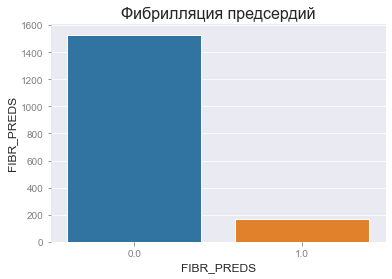

0.0    1529
1.0     170
Name: FIBR_PREDS, dtype: int64
NaN:  1


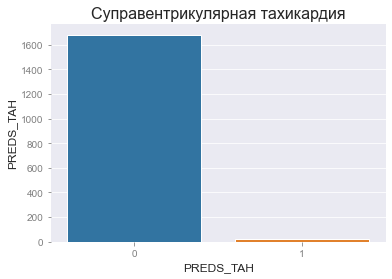

0    1680
1      20
Name: PREDS_TAH, dtype: int64
NaN:  0


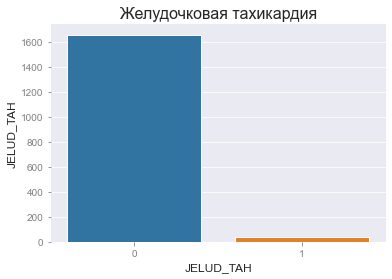

0    1658
1      42
Name: JELUD_TAH, dtype: int64
NaN:  0


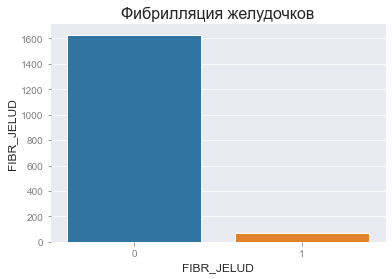

0    1629
1      71
Name: FIBR_JELUD, dtype: int64
NaN:  0


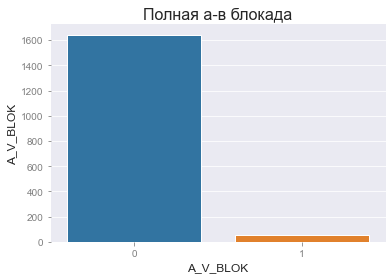

0    1643
1      57
Name: A_V_BLOK, dtype: int64
NaN:  0


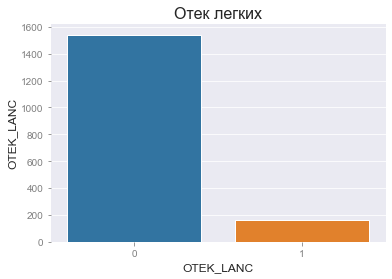

0    1541
1     159
Name: OTEK_LANC, dtype: int64
NaN:  0


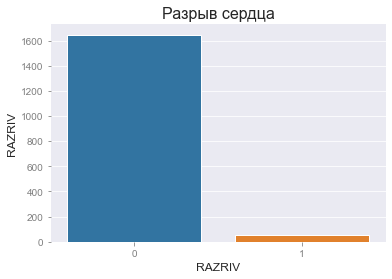

0    1646
1      54
Name: RAZRIV, dtype: int64
NaN:  0


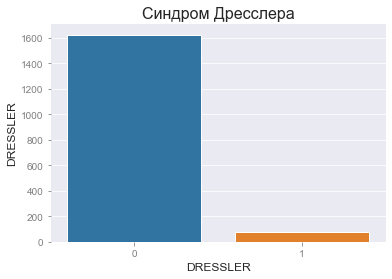

0    1625
1      75
Name: DRESSLER, dtype: int64
NaN:  0


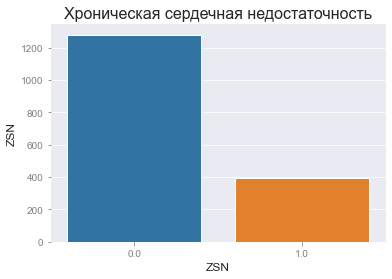

0.0    1280
1.0     394
Name: ZSN, dtype: int64
NaN:  26


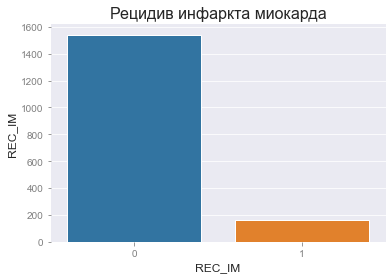

0    1541
1     159
Name: REC_IM, dtype: int64
NaN:  0


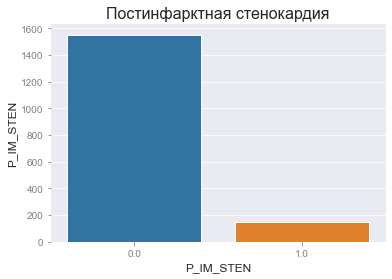

0.0    1551
1.0     148
Name: P_IM_STEN, dtype: int64
NaN:  1


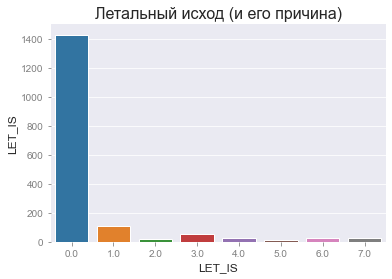

0.0    1427
1.0     110
3.0      54
6.0      27
7.0      27
4.0      23
2.0      18
5.0      12
Name: LET_IS, dtype: int64
NaN:  2


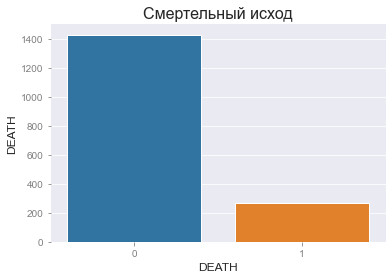

0    1429
1     271
Name: DEATH, dtype: int64
NaN:  0


In [40]:
for target in target_columns:
    bar_plot(dataframe, target, dict_params[target])
    print(dataframe[target].value_counts())
    print('NaN: ', dataframe[target].isna().sum())

# Controlled and observed features

In [42]:
observed_features = []

# личные данные
# анамнез
# Инфо на момент поступления
# - отек легких
# - пароксизм желудочковой тахикардии
# - фибрилляция желудочков
# - кардиогенный шок
# - Пароксизм фибрилляции предсердий
# - Пароксизм суправентрикулярной тахикардии
# Инфаркт
# Ритм ЭКГ
# Содержание АлАТ в крови
# Содержание АсАТ в крови
# Содержание КФК в крови
# Содержание лейкоцитов в крови
# СОЭ (скорость оседания эритроцитов) 
# Экстросистолия на ЭКГ на момент поступления
# Фибрилляция желудочков на ЭКГ на момент поступления
# Блокада на момент поступления
# Рецидивирование ангинозных болей
# Время, прошедшее от начала ангинозного приступа до поступления в стационар
# Применение лекарств кардиобригадой
# Применение лекарств в отделении реанимации

observed_features.extend(['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK'
                    , 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A'
                    ,'K_SH_POST', 'MP_TP_POST', 'SVT_POST'
                    , 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07'
                    , 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_08'
                    , 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03'
                    , 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04'
                    , 'zab_leg_06', 'O_L_POST', 'GT_POST', 'FIB_G_POST'
                    ,'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P'
                    , 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04'
                    , 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ALT_BLOOD'
                    , 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE'                    
                    ,'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03'
                    , 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06'
                    , 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10'
                    , 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04'
                    , 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07'
                    , 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10'
                    , 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'R_AB_1_n', 'R_AB_2_n'
                    , 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'TIME_B_S'
                    ,'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n'
                    , 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n'
                    , 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n'
                    , 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n'])

In [44]:
controlled_features = []

# Инфо на момент поступления
# - систолическое и диастолическое АД
# Ритм по ЭКГ при поступлении - синусовый с ЧСС более 90 в мин. (синусовая тахикардия)',
# Ритм по ЭКГ при поступлении - синусовый с ЧСС менее 60 в мин. (синусовая брадикардия)',
# Фибринолитическая терапия
# Гипокалиемия
# Содержание калия в сыворотке крови, 
# Увеличение натрия в сыворотке крови
# Содержание натрия в сыворотке крови
controlled_features.extend(['S_AD_ORIT', 'D_AD_ORIT', 'ritm_ecg_p_07', 'ritm_ecg_p_08'
                         , 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03'
                         , 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07'
                         , 'fibr_ter_08', 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD'])

# Missing values

In [45]:
dataframe.isna().sum().sum()

15983

In [46]:
missing_values_table(dataframe)

,Missing Values,% of Total Values
KFK_BLOOD,1696,99.765
IBS_NASL,1628,95.765
S_AD_KBRIG,1070,62.941
D_AD_KBRIG,1070,62.941
NOT_NA_KB,686,40.353
...,...,...
INF_ANAM,4,0.235
LET_IS,2,0.118
IM_PG_P,1,0.059
FIBR_PREDS,1,0.059


# KFK_BLOOD

In [47]:
dataframe['KFK_BLOOD'].unique()

array([nan, 1.8, 1.4, 1.2, 3.6])

In [48]:
dataframe['KFK_BLOOD'].value_counts()

3.6    1
1.4    1
1.8    1
1.2    1
Name: KFK_BLOOD, dtype: int64

# IBS_NASL

In [49]:
dataframe['IBS_NASL'].unique()

array([nan,  1.,  0.])

In [50]:
dataframe['IBS_NASL'].value_counts()

0.0    45
1.0    27
Name: IBS_NASL, dtype: int64

In [51]:
missing_values = missing_values_table(dataframe)
drop_columns = missing_values[missing_values['% of Total Values'] >= 90]
dataframe.drop(drop_columns.index, axis='columns', inplace=True)
correct_list_features(drop_columns.index)

In [52]:
missing_values_table(dataframe)

,Missing Values,% of Total Values
S_AD_KBRIG,1070,62.941
D_AD_KBRIG,1070,62.941
NOT_NA_KB,686,40.353
LID_KB,677,39.824
NA_KB,657,38.647
...,...,...
INF_ANAM,4,0.235
LET_IS,2,0.118
IM_PG_P,1,0.059
FIBR_PREDS,1,0.059


# S_AD_KBRIG

Систолическое АД по данным кардиобригады

In [53]:
dataframe['S_AD_KBRIG'].unique()

array([ nan, 130., 140., 170., 110., 100.,  90., 150., 120., 160.,  60.,
       125., 180., 260., 105.,  50., 220., 210., 115.,  70.,  80., 200.,
       190., 145., 135., 155., 240., 230., 185.,  40.,   0.])

In [54]:
dataframe['S_AD_KBRIG'].value_counts()

140.0    91
130.0    77
160.0    73
120.0    65
110.0    46
150.0    44
170.0    30
180.0    29
100.0    26
80.0     24
90.0     24
190.0    13
200.0    12
60.0     11
210.0    10
220.0     8
70.0      7
145.0     6
115.0     6
125.0     6
50.0      5
155.0     3
105.0     3
40.0      3
240.0     2
260.0     2
0.0       1
135.0     1
230.0     1
185.0     1
Name: S_AD_KBRIG, dtype: int64

In [55]:
tmp = dataframe[['S_AD_KBRIG', 'S_AD_ORIT']]

In [56]:
tmp = tmp[~tmp['S_AD_KBRIG'].isna()]

In [57]:
tmp['delta'] = np.abs(tmp['S_AD_KBRIG'] - tmp['S_AD_ORIT'])

In [58]:
tmp['delta'].describe()

count    592.000000
mean      22.508446
std       20.948327
min        0.000000
25%       10.000000
50%       20.000000
75%       30.000000
max      120.000000
Name: delta, dtype: float64

In [59]:
tmp

,S_AD_KBRIG,S_AD_ORIT,delta
1,130.0,140.0,10.0
6,140.0,130.0,10.0
10,170.0,150.0,20.0
16,130.0,160.0,30.0
20,110.0,120.0,10.0
...,...,...,...
1684,120.0,90.0,30.0
1685,70.0,80.0,10.0
1689,80.0,40.0,40.0
1690,50.0,0.0,50.0


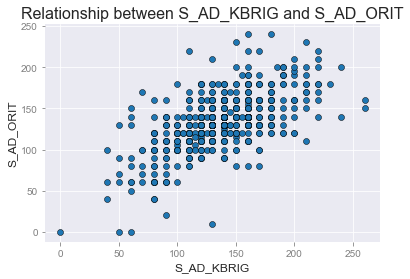

In [60]:
scatter_plot(tmp, 'S_AD_KBRIG', 'S_AD_ORIT')

In [61]:
S_AD_KBRIG = dataframe['S_AD_KBRIG']

# D_AD_KBRIG

In [62]:
dataframe['D_AD_KBRIG'].unique()

array([ nan,  85.,  90., 100.,  70.,  80.,  60.,  40., 120., 110.,  50.,
        10.,   0.,  20., 140.,  95., 160.,  30., 190.,  65.,  75.,  45.])

In [63]:
dataframe['D_AD_KBRIG'].value_counts()

80.0     167
90.0     154
100.0     86
70.0      78
60.0      59
120.0     16
110.0     15
40.0      11
20.0      10
0.0        7
85.0       6
50.0       6
30.0       5
75.0       2
65.0       2
140.0      1
160.0      1
45.0       1
95.0       1
190.0      1
10.0       1
Name: D_AD_KBRIG, dtype: int64

In [64]:
tmp = dataframe[['D_AD_KBRIG', 'D_AD_ORIT']]

In [65]:
tmp = tmp[~tmp['D_AD_KBRIG'].isna()]

In [66]:
tmp['delta'] = np.abs(tmp['D_AD_KBRIG'] - tmp['D_AD_ORIT'])

In [67]:
tmp['delta'].describe()

count    592.000000
mean      13.167230
std       13.526714
min        0.000000
25%        0.000000
50%       10.000000
75%       20.000000
max       90.000000
Name: delta, dtype: float64

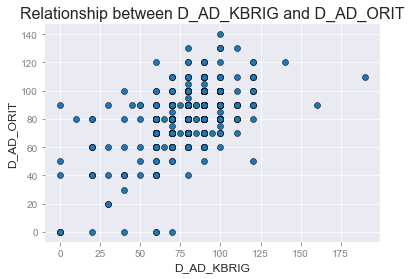

In [68]:
scatter_plot(tmp, 'D_AD_KBRIG', 'D_AD_ORIT')

In [69]:
D_AD_KBRIG = dataframe['D_AD_KBRIG']

In [70]:
missing_values = missing_values_table(dataframe)
drop_columns = missing_values[missing_values['% of Total Values'] >= 60]
dataframe.drop(drop_columns.index, axis='columns', inplace=True)
correct_list_features(drop_columns.index)

In [71]:
missing_values_table(dataframe)

,Missing Values,% of Total Values
NOT_NA_KB,686,40.353
LID_KB,677,39.824
NA_KB,657,38.647
GIPER_NA,375,22.059
NA_BLOOD,375,22.059
...,...,...
INF_ANAM,4,0.235
LET_IS,2,0.118
IM_PG_P,1,0.059
FIBR_PREDS,1,0.059


# Numeric features

count    1665.000000
mean       61.800000
std        11.269438
min        26.000000
25%        54.000000
50%        63.000000
75%        70.000000
max        92.000000
Name: AGE, dtype: float64


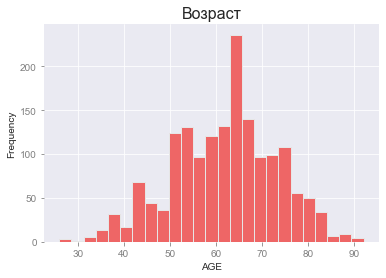

In [94]:
feature = numeric_features[0]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

# Нормы артериального давления по классификации ВОЗ

1. Оптимальное давление	      
    - Систолическое АД (мм. рт. ст.) 100–119
    - Диастолическое АД (мм. рт. ст.) 60–79
2. Нормальное давление      
    - Систолическое АД (мм. рт. ст.) 120–129
    - Диастолическое АД (мм. рт. ст.) 80–84
3. Гипотония (пониженное)      
    - Систолическое АД (мм. рт. ст.) ниже 100
    - Диастолическое АД (мм. рт. ст.) ниже 60
4. Высокое нормальное давление 
    - Систолическое АД (мм. рт. ст.) 130–139	                                    
    - Диастолическое АД (мм. рт. ст.) 85–89
5. Умеренная гипертония (повышенное) 
    - Систолическое АД (мм. рт. ст.) 140–159	                                    
    - Диастолическое АД (мм. рт. ст.) 90–99
6. Гипертония средней тяжести  
    - Систолическое АД (мм. рт. ст.) 160–179	                                   
    - Диастолическое АД (мм. рт. ст.) 100–109
7. Тяжелая гипертония
    - Систолическое АД (мм. рт. ст.) более 180	                                  
    - Диастолическое АД (мм. рт. ст.) более 110

count    1411.000000
mean      136.183558
std        28.637790
min        60.000000
25%       120.000000
50%       130.000000
75%       150.000000
max       260.000000
Name: S_AD_ORIT, dtype: float64


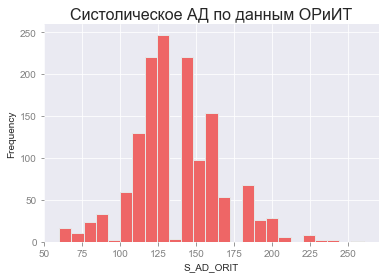

In [95]:
feature = numeric_features[1]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

count    1410.000000
mean       84.021277
std        15.456144
min        40.000000
25%        80.000000
50%        80.000000
75%        90.000000
max       190.000000
Name: D_AD_ORIT, dtype: float64


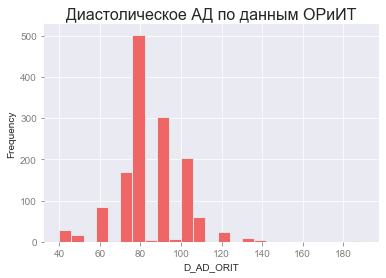

In [96]:
feature = numeric_features[2]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

# Содержание калия
Референсные значения находятся в пределах 3,4 – 5,0 ммоль/л

count    1315.000000
mean        4.192167
std         0.756740
min         2.300000
25%         3.700000
50%         4.100000
75%         4.600000
max         8.200000
Name: K_BLOOD, dtype: float64


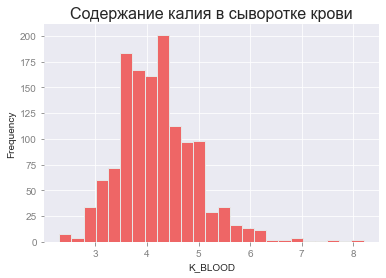

In [97]:
feature = numeric_features[3]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

# Содержание натрия
Референсные значения находятся в пределах (136–145 ммоль/л)

count    1311.000000
mean      136.578185
std         6.510223
min       117.000000
25%       133.000000
50%       136.000000
75%       140.000000
max       169.000000
Name: NA_BLOOD, dtype: float64


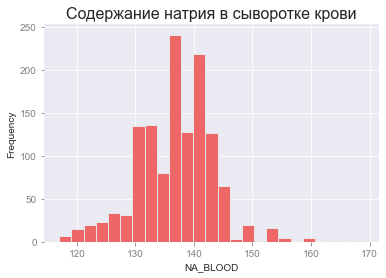

In [98]:
feature = numeric_features[4]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

# Содержание АЛТ
- Норма у мужчин: до 45 Ед/л. (0,5 – 2 мкмоль)
- Норма у женщин: до 34 Ед/л. (0,5 – 1,5 мкмоль)
- В ммоль/л: 28 – 190 ммоль/л (0,12 - 0,88)

count    1399.000000
mean        0.479271
std         0.385790
min         0.030000
25%         0.230000
50%         0.380000
75%         0.610000
max         3.000000
Name: ALT_BLOOD, dtype: float64


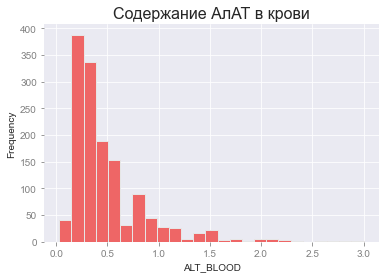

In [99]:
feature = numeric_features[5]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

## Содержание АСТ
- Норма у мужчин:	до 41 Ед/л	
- Норма у женщин: до 31 Ед/л	
- В ммоль/л: 28 – 125 ммоль/л (0,18-0,78)

count    1398.000000
mean        0.262103
std         0.200196
min         0.040000
25%         0.150000
50%         0.220000
75%         0.330000
max         2.150000
Name: AST_BLOOD, dtype: float64


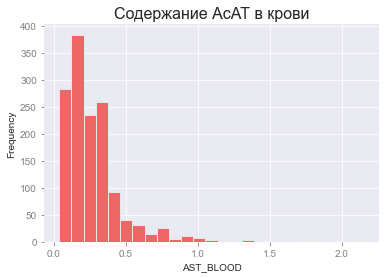

In [100]:
feature = numeric_features[6]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

## Содержание лейкоцитов
В норме лейкоциты в крови у взрослых мужчин и женщин содержатся в количестве 4-9x10 Ед/л

count    1555.000000
mean        8.755878
std         3.370989
min         2.000000
25%         6.400000
50%         8.000000
75%        10.400000
max        27.900000
Name: L_BLOOD, dtype: float64


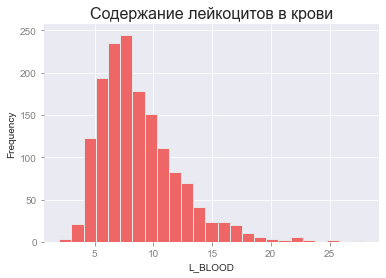

In [101]:
feature = numeric_features[7]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

# Cкорость оседания эритроцитов

1. Женщины
    - возраст от 10 до 50 лет: 0–20 мм/ч
    - старше 50 лет: 0-30 мм/ч
2. Мужчины 
    - возраст от 10 до 50 лет: 0–15 мм/ч 
    - старше 50 лет: 0–20 мм/ч

count    1481.000000
mean       13.481431
std        11.327369
min         1.000000
25%         5.000000
50%        10.000000
75%        19.000000
max       140.000000
Name: ROE, dtype: float64


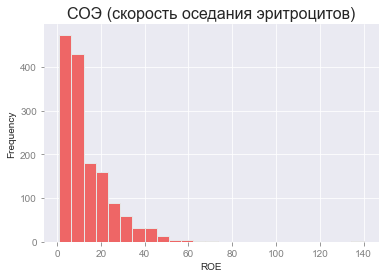

In [102]:
feature = numeric_features[8]
print(dataframe[feature].describe())
hist_plot(dataframe, feature, feature, 'Frequency', dict_params[feature])

# Систолическое АД и Диастолическое АД

In [81]:
print(dict_params['S_AD_ORIT'])
dataframe['S_AD_ORIT'].unique()

Систолическое АД по данным ОРиИТ


array([120., 140., 130., 170., 190.,  nan, 150., 160., 110., 105., 100.,
       180., 200.,  80., 220.,  90., 115.,  60.,  70., 230., 210., 145.,
       195., 125., 135.,  95., 240.,  10., 155.,   0., 260.,  40.,  50.,
        20.])

In [82]:
dataframe['S_AD_ORIT'].value_counts()

130.0    243
120.0    220
140.0    219
160.0    154
110.0    123
150.0     96
180.0     68
100.0     55
170.0     54
90.0      33
200.0     28
190.0     25
80.0      24
60.0      21
70.0      12
0.0        9
220.0      8
115.0      7
210.0      6
40.0       5
105.0      4
125.0      4
50.0       3
145.0      3
135.0      3
95.0       2
240.0      2
230.0      2
195.0      1
260.0      1
20.0       1
155.0      1
10.0       1
Name: S_AD_ORIT, dtype: int64

In [83]:
tmp = dataframe.loc[dataframe['S_AD_ORIT'] < 60.0].sort_values('S_AD_ORIT')
tmp

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,...,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS,DEATH
1699,1700,63.0,1,2.0,NaN,NaN,NaN,2.0,0.0,NaN,...,0,0,0,0,0,0.0,0,0.0,1.0,1
936,937,64.0,1,0.0,NaN,2.0,1.0,2.0,0.0,NaN,...,0,1,0,0,0,0.0,0,0.0,0.0,0
1690,1691,46.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0,0.0,1.0,1
1568,1569,64.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,...,0,0,0,0,0,0.0,0,0.0,7.0,1
1577,1578,51.0,1,2.0,6.0,2.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0,0.0,1.0,1
1680,1681,70.0,1,1.0,NaN,NaN,NaN,2.0,0.0,NaN,...,0,0,0,0,0,0.0,0,0.0,1.0,1
1644,1645,51.0,1,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,0,0,0,0,0,0.0,0,0.0,1.0,1
1674,1675,62.0,1,1.0,1.0,2.0,1.0,2.0,0.0,NaN,...,0,0,0,0,0,0.0,0,0.0,1.0,1
1662,1663,54.0,1,2.0,3.0,2.0,NaN,0.0,0.0,0.0,...,0,1,0,0,0,0.0,0,0.0,1.0,1
654,655,50.0,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0.0,0,0.0,0.0,0


In [84]:
dataframe.drop(dataframe[dataframe['S_AD_ORIT'] < 60.0].index, axis=0, inplace=True)

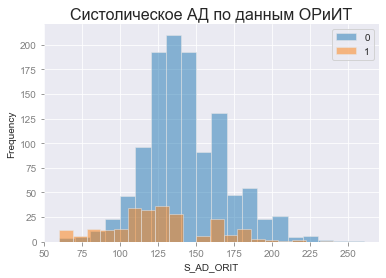

In [103]:
hist_plot(dataframe, 'S_AD_ORIT', 'DEATH', 'S_AD_ORIT', 'Frequency', dict_params['S_AD_ORIT'], 20)

In [104]:
dataframe['D_AD_ORIT'].unique()

array([ 70.,  80.,  90., 100.,  nan,  60., 110., 120.,  95.,  40., 140.,
       130.,  75.,  50.,  85., 190., 105.,  65.])

In [105]:
dataframe['D_AD_ORIT'].value_counts()

80.0     502
90.0     302
100.0    201
70.0     166
60.0      84
110.0     59
40.0      28
120.0     23
50.0      16
130.0      8
95.0       6
140.0      4
85.0       4
75.0       3
105.0      2
190.0      1
65.0       1
Name: D_AD_ORIT, dtype: int64

In [106]:
dataframe.loc[dataframe['D_AD_ORIT'] < 40.0].sort_values('D_AD_ORIT').head(50)

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,...,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS,DEATH


In [90]:
dataframe.drop(dataframe[dataframe['D_AD_ORIT'] < 40.0].index, axis=0, inplace=True)

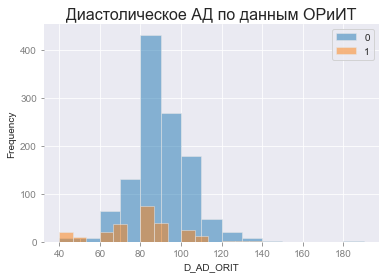

In [108]:
hist_plot(dataframe, 'D_AD_ORIT', 'DEATH', 'D_AD_ORIT', 'Frequency', dict_params['D_AD_ORIT'], bins=15)

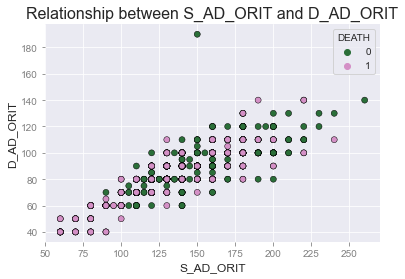

In [109]:
scatter_plot(dataframe, 'S_AD_ORIT', 'D_AD_ORIT', hue='DEATH')

# Binary features

In [110]:
bin_features = list((Counter(dataframe.columns) & Counter(binary_features)).elements())

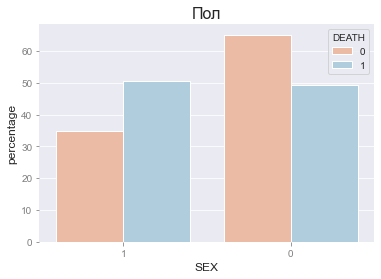

1    1050
0     623
Name: SEX, dtype: int64


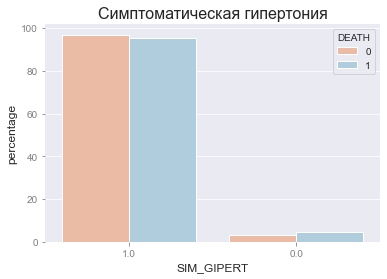

0.0    1612
1.0      55
Name: SIM_GIPERT, dtype: int64


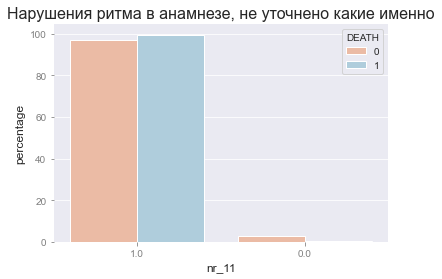

0.0    1618
1.0      42
Name: nr_11, dtype: int64


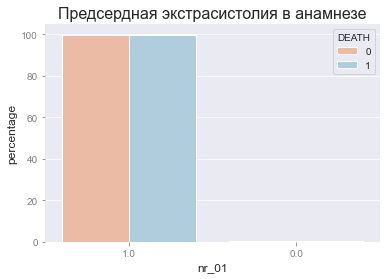

0.0    1656
1.0       4
Name: nr_01, dtype: int64


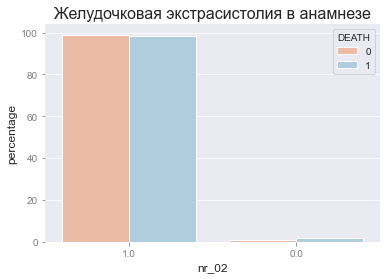

0.0    1641
1.0      19
Name: nr_02, dtype: int64


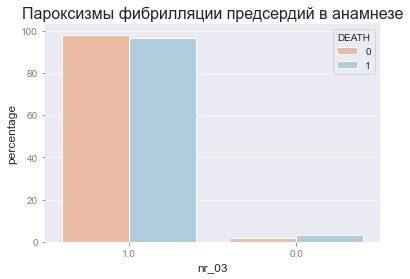

0.0    1625
1.0      35
Name: nr_03, dtype: int64


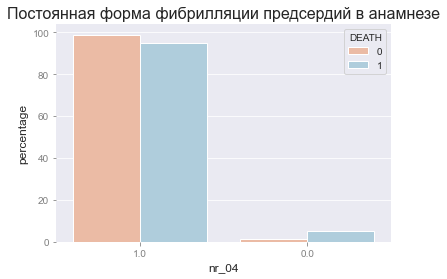

0.0    1632
1.0      28
Name: nr_04, dtype: int64


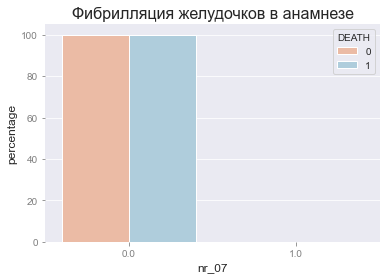

0.0    1659
1.0       1
Name: nr_07, dtype: int64


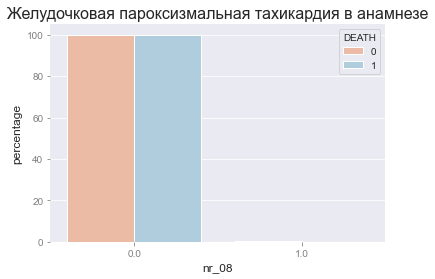

0.0    1657
1.0       3
Name: nr_08, dtype: int64


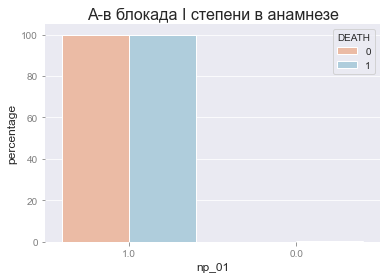

0.0    1661
1.0       2
Name: np_01, dtype: int64


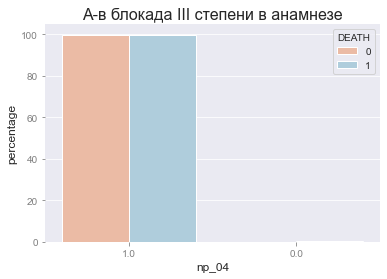

0.0    1660
1.0       3
Name: np_04, dtype: int64


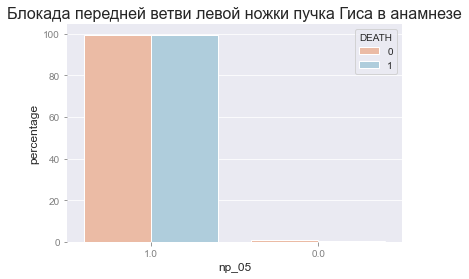

0.0    1652
1.0      11
Name: np_05, dtype: int64


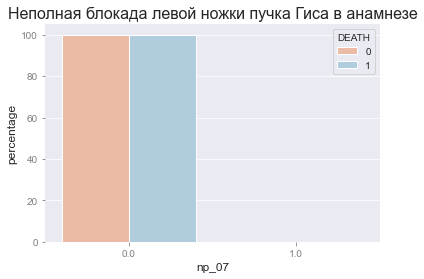

0.0    1662
1.0       1
Name: np_07, dtype: int64


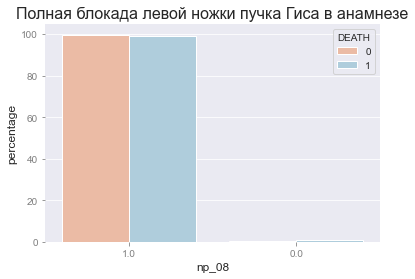

0.0    1657
1.0       6
Name: np_08, dtype: int64


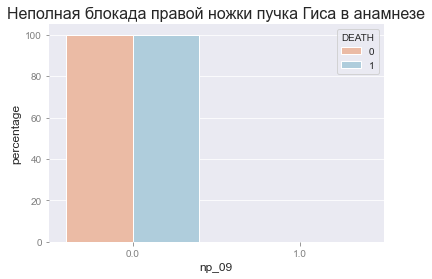

0.0    1661
1.0       2
Name: np_09, dtype: int64


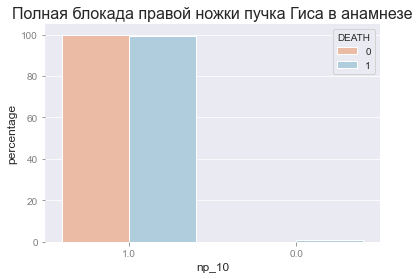

0.0    1660
1.0       3
Name: np_10, dtype: int64


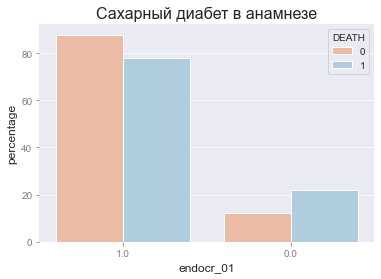

0.0    1438
1.0     226
Name: endocr_01, dtype: int64


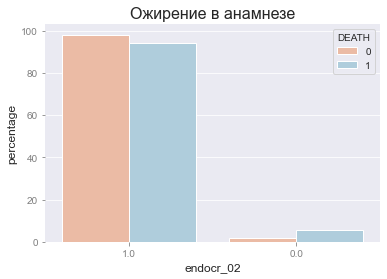

0.0    1624
1.0      41
Name: endocr_02, dtype: int64


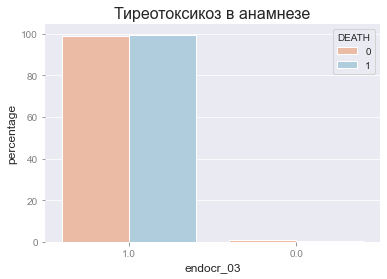

0.0    1652
1.0      13
Name: endocr_03, dtype: int64


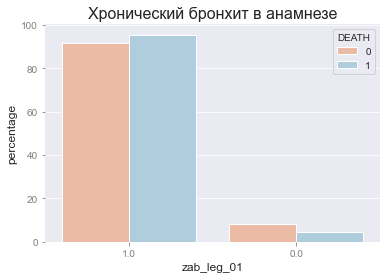

0.0    1537
1.0     131
Name: zab_leg_01, dtype: int64


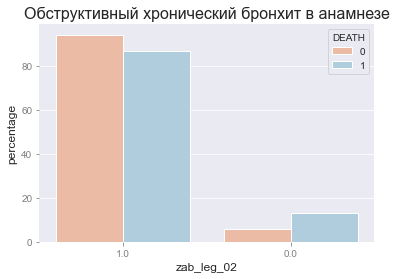

0.0    1553
1.0     115
Name: zab_leg_02, dtype: int64


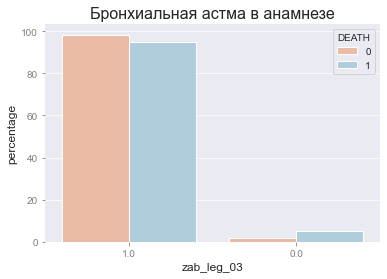

0.0    1631
1.0      37
Name: zab_leg_03, dtype: int64


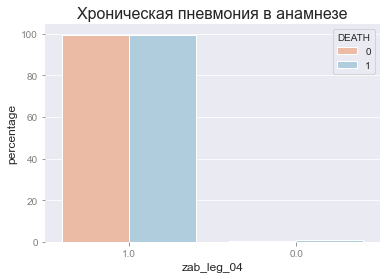

0.0    1659
1.0       9
Name: zab_leg_04, dtype: int64


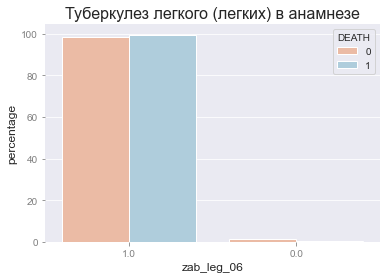

0.0    1646
1.0      22
Name: zab_leg_06, dtype: int64


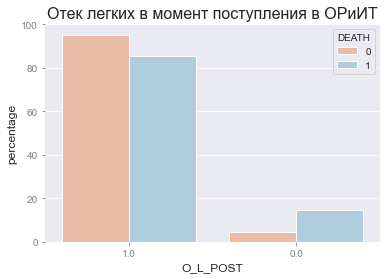

0.0    1558
1.0     103
Name: O_L_POST, dtype: int64


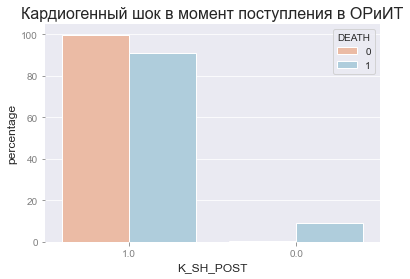

0.0    1634
1.0      25
Name: K_SH_POST, dtype: int64


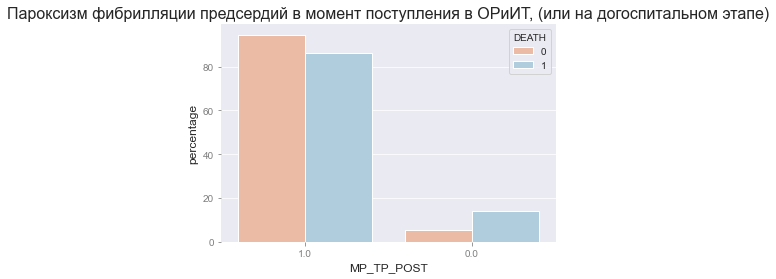

0.0    1548
1.0     111
Name: MP_TP_POST, dtype: int64


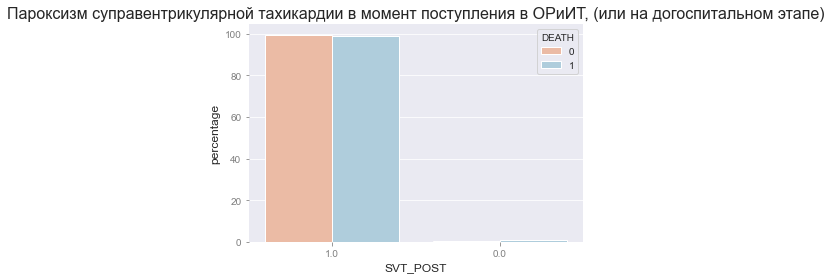

0.0    1653
1.0       8
Name: SVT_POST, dtype: int64


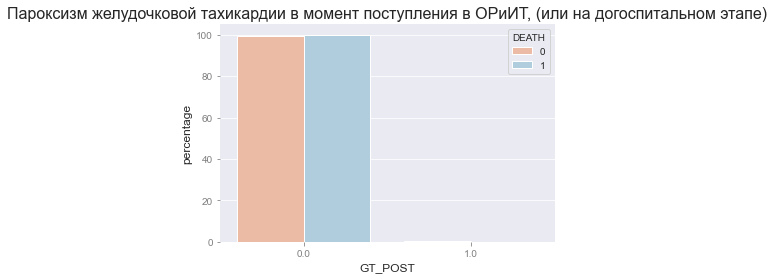

0.0    1654
1.0       7
Name: GT_POST, dtype: int64


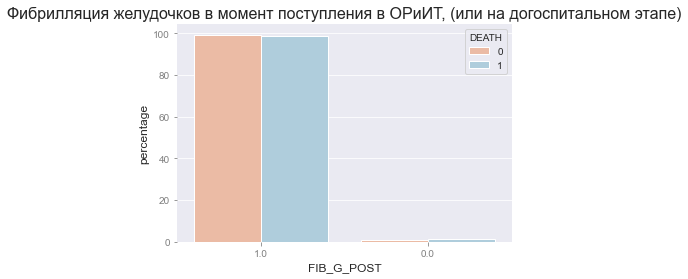

0.0    1648
1.0      13
Name: FIB_G_POST, dtype: int64


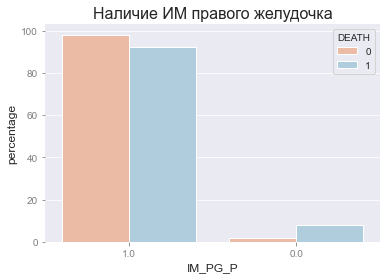

0.0    1626
1.0      46
Name: IM_PG_P, dtype: int64


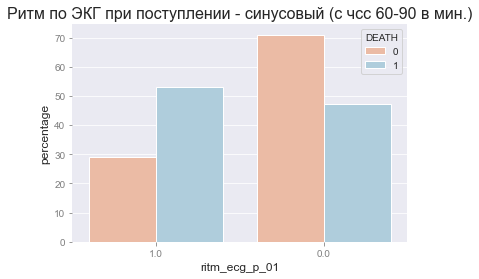

1.0    1025
0.0     500
Name: ritm_ecg_p_01, dtype: int64


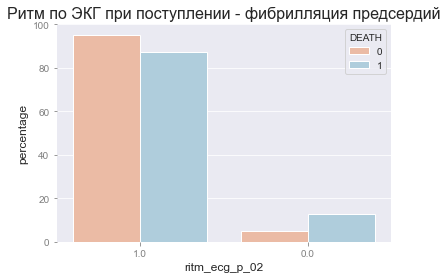

0.0    1433
1.0      92
Name: ritm_ecg_p_02, dtype: int64


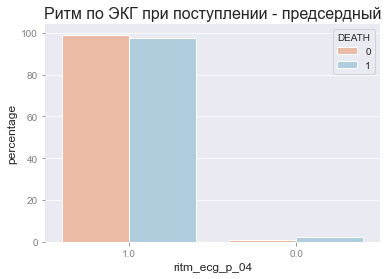

0.0    1507
1.0      18
Name: ritm_ecg_p_04, dtype: int64


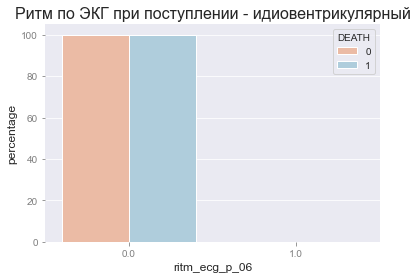

0.0    1524
1.0       1
Name: ritm_ecg_p_06, dtype: int64


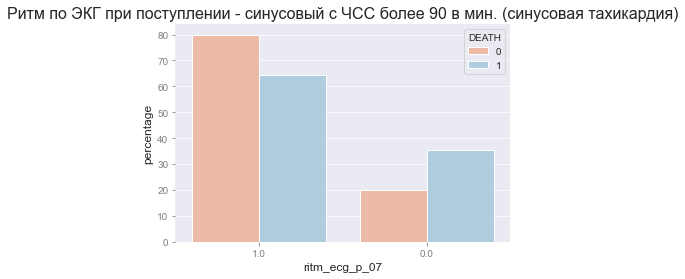

0.0    1182
1.0     343
Name: ritm_ecg_p_07, dtype: int64


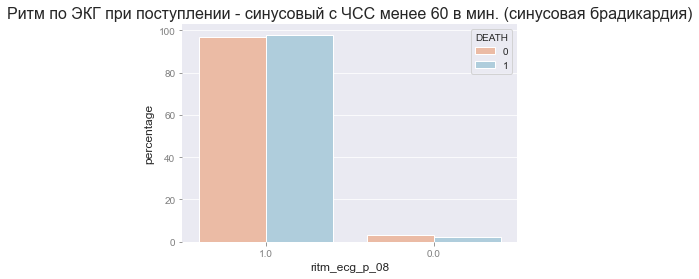

0.0    1480
1.0      45
Name: ritm_ecg_p_08, dtype: int64


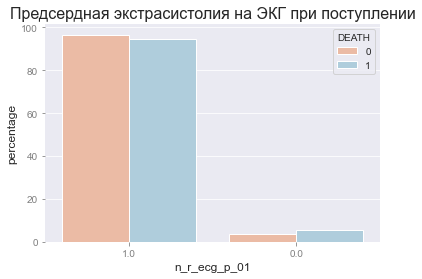

0.0    1504
1.0      58
Name: n_r_ecg_p_01, dtype: int64


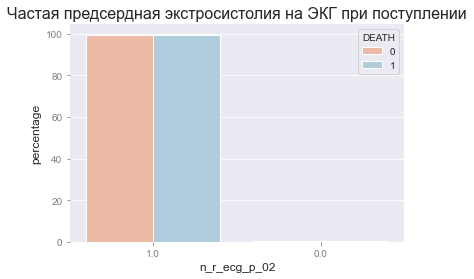

0.0    1554
1.0       8
Name: n_r_ecg_p_02, dtype: int64


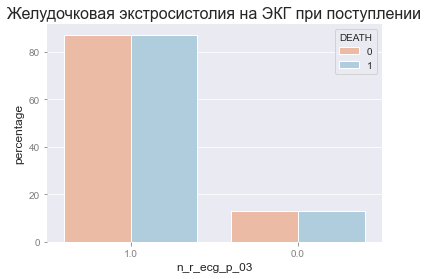

0.0    1361
1.0     201
Name: n_r_ecg_p_03, dtype: int64


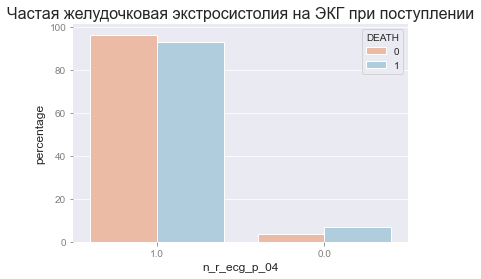

0.0    1495
1.0      67
Name: n_r_ecg_p_04, dtype: int64


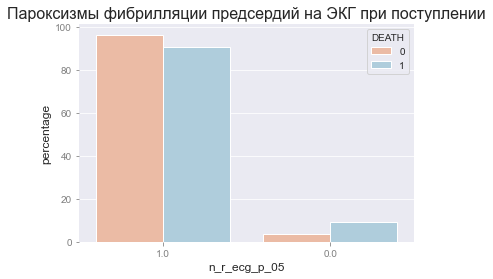

0.0    1493
1.0      69
Name: n_r_ecg_p_05, dtype: int64


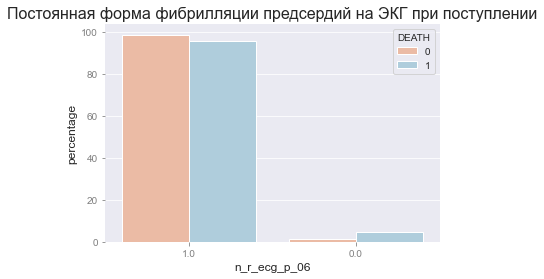

0.0    1532
1.0      30
Name: n_r_ecg_p_06, dtype: int64


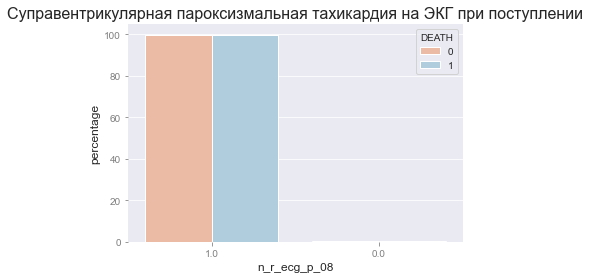

0.0    1558
1.0       4
Name: n_r_ecg_p_08, dtype: int64


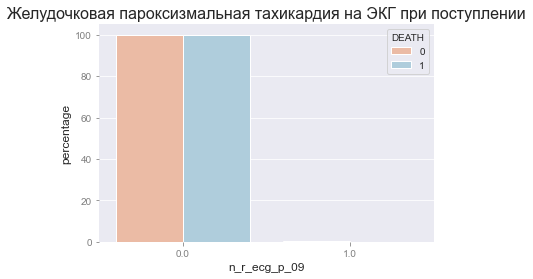

0.0    1560
1.0       2
Name: n_r_ecg_p_09, dtype: int64


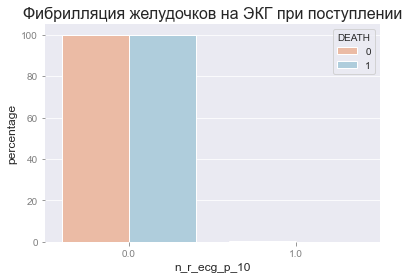

0.0    1560
1.0       2
Name: n_r_ecg_p_10, dtype: int64


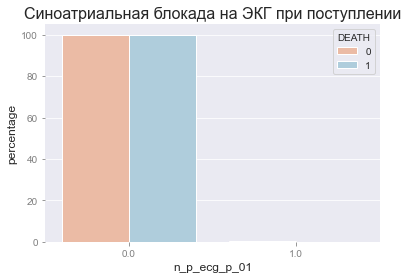

0.0    1559
1.0       2
Name: n_p_ecg_p_01, dtype: int64


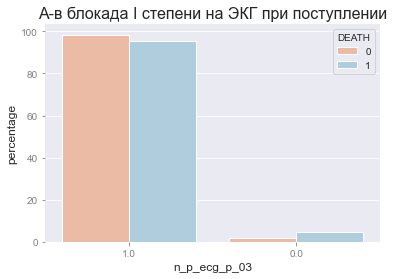

0.0    1529
1.0      32
Name: n_p_ecg_p_03, dtype: int64


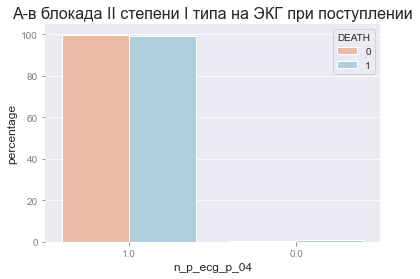

0.0    1556
1.0       5
Name: n_p_ecg_p_04, dtype: int64


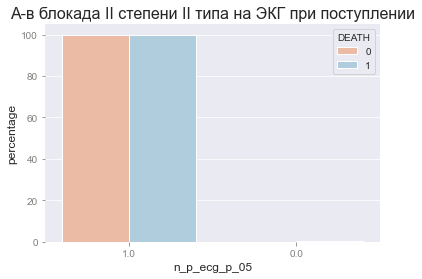

0.0    1559
1.0       2
Name: n_p_ecg_p_05, dtype: int64


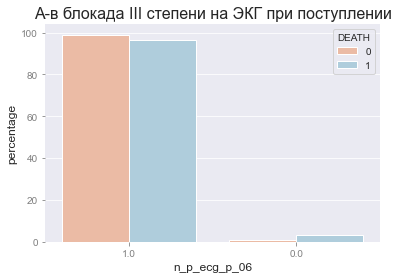

0.0    1540
1.0      21
Name: n_p_ecg_p_06, dtype: int64


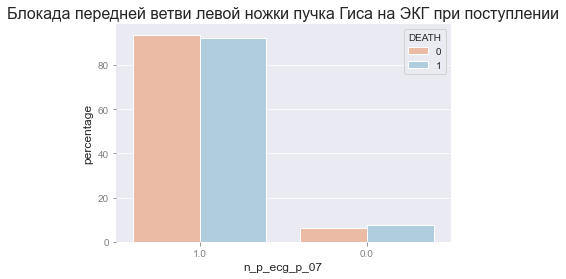

0.0    1460
1.0     101
Name: n_p_ecg_p_07, dtype: int64


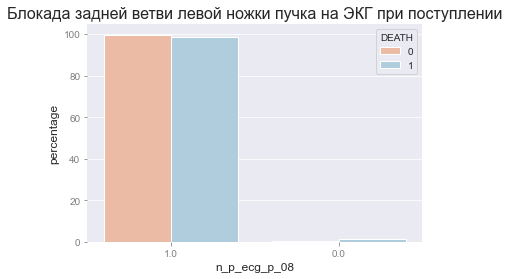

0.0    1554
1.0       7
Name: n_p_ecg_p_08, dtype: int64


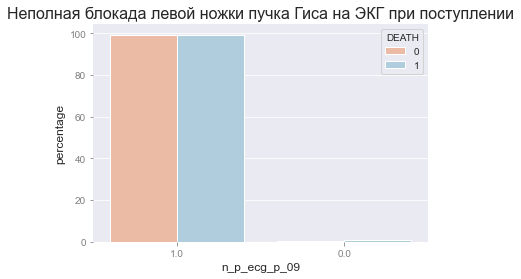

0.0    1551
1.0      10
Name: n_p_ecg_p_09, dtype: int64


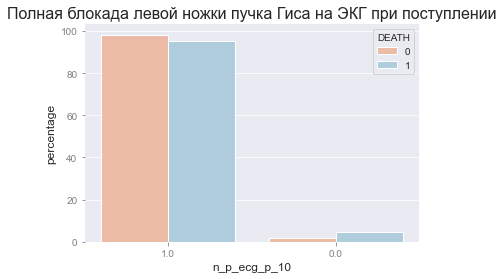

0.0    1527
1.0      34
Name: n_p_ecg_p_10, dtype: int64


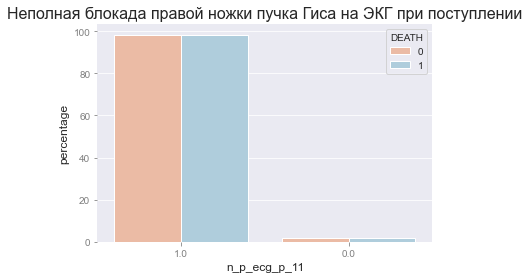

0.0    1533
1.0      28
Name: n_p_ecg_p_11, dtype: int64


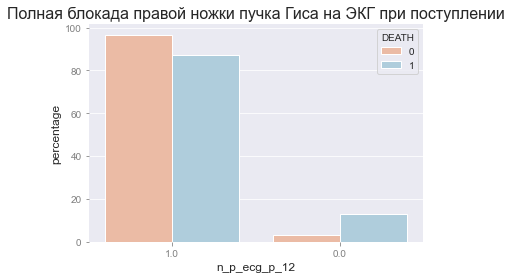

0.0    1486
1.0      75
Name: n_p_ecg_p_12, dtype: int64


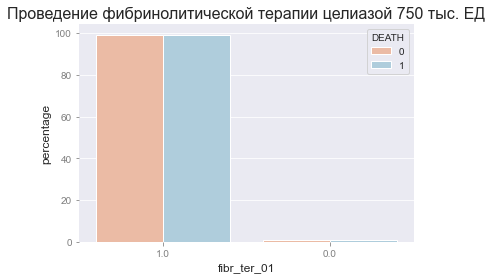

0.0    1650
1.0      13
Name: fibr_ter_01, dtype: int64


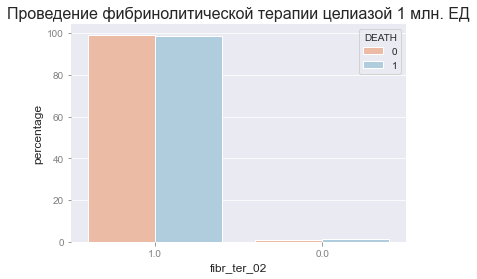

0.0    1649
1.0      14
Name: fibr_ter_02, dtype: int64


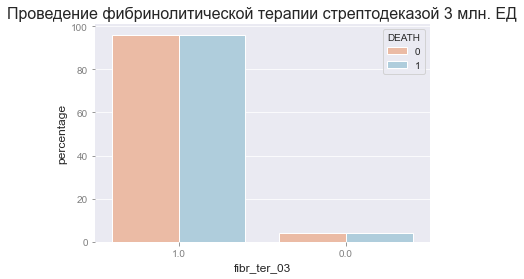

0.0    1597
1.0      66
Name: fibr_ter_03, dtype: int64


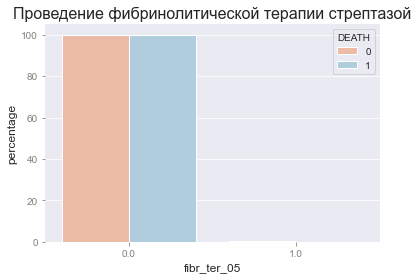

0.0    1659
1.0       4
Name: fibr_ter_05, dtype: int64


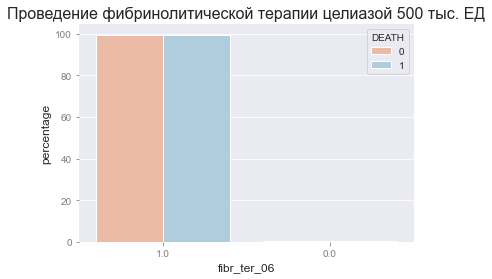

0.0    1655
1.0       8
Name: fibr_ter_06, dtype: int64


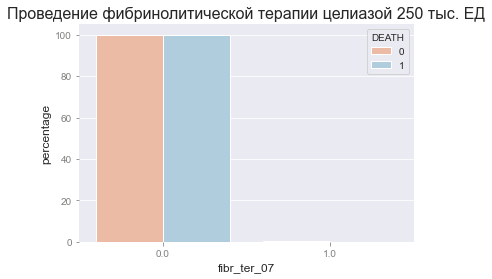

0.0    1658
1.0       5
Name: fibr_ter_07, dtype: int64


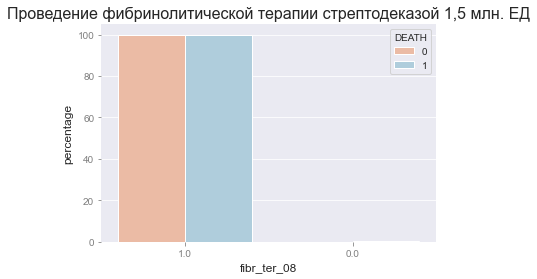

0.0    1661
1.0       2
Name: fibr_ter_08, dtype: int64


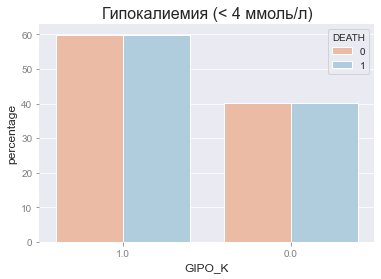

0.0    789
1.0    528
Name: GIPO_K, dtype: int64


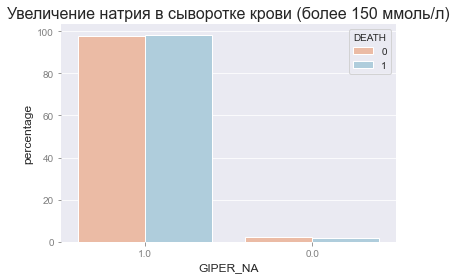

0.0    1281
1.0      30
Name: GIPER_NA, dtype: int64


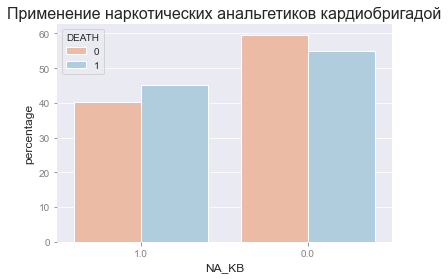

1.0    605
0.0    423
Name: NA_KB, dtype: int64


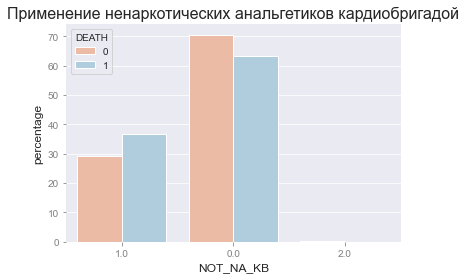

1.0    695
0.0    306
2.0      1
Name: NOT_NA_KB, dtype: int64


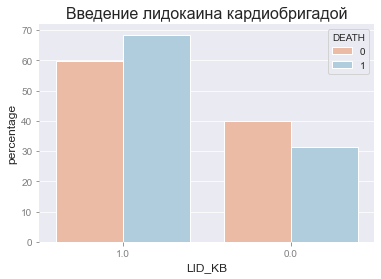

0.0    620
1.0    391
Name: LID_KB, dtype: int64


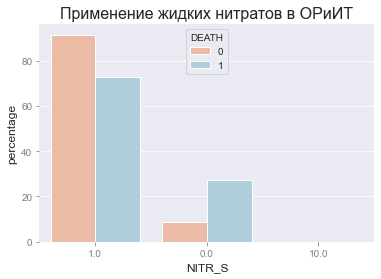

0.0     1475
1.0      188
10.0       1
Name: NITR_S, dtype: int64


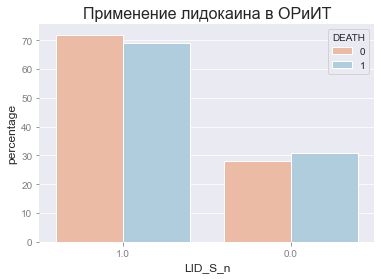

0.0    1189
1.0     474
Name: LID_S_n, dtype: int64


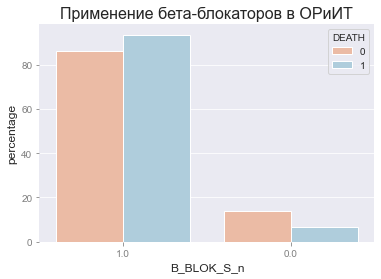

0.0    1447
1.0     215
Name: B_BLOK_S_n, dtype: int64


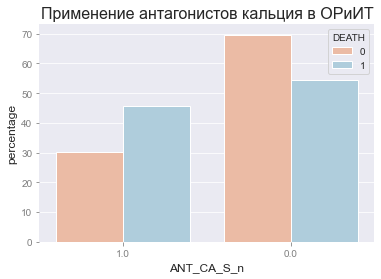

1.0    1119
0.0     541
Name: ANT_CA_S_n, dtype: int64


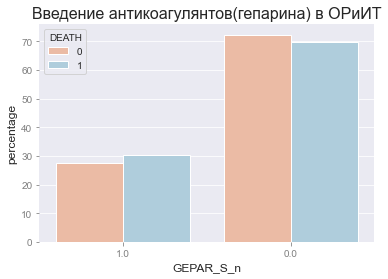

1.0    1192
0.0     464
Name: GEPAR_S_n, dtype: int64


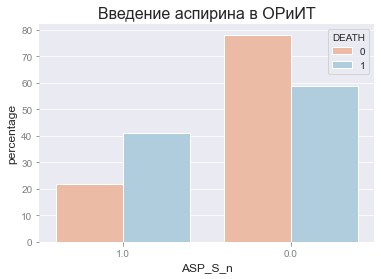

1.0    1247
0.0     409
Name: ASP_S_n, dtype: int64


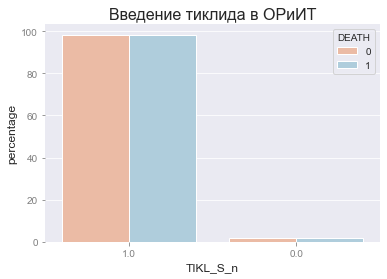

0.0    1627
1.0      30
Name: TIKL_S_n, dtype: int64


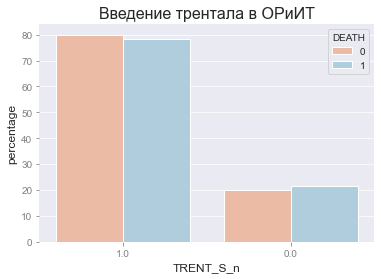

0.0    1321
1.0     336
Name: TRENT_S_n, dtype: int64


In [111]:
for bin_feature in bin_features:
    bar_plot(dataframe, bin_feature, dict_params[bin_feature], 'DEATH')
    print(dataframe[bin_feature].value_counts())

In [115]:
dataframe.drop(dataframe[dataframe['NITR_S'] == 10].index, axis=0, inplace=True)

In [118]:
dataframe.drop(dataframe[dataframe['NOT_NA_KB'] == 2].index, axis=0, inplace=True)

# Categorial features

In [120]:
cat_features = list((Counter(dataframe.columns) & ((Counter(zero_day) - Counter(binary_features) - Counter(numeric_features)))).elements())

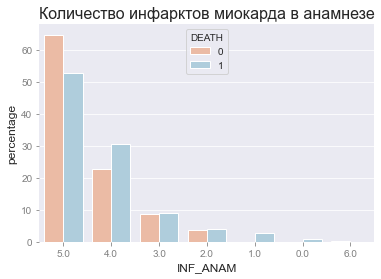

0.0    1050
1.0     399
2.0     144
3.0      61
4.0       8
6.0       4
5.0       3
Name: INF_ANAM, dtype: int64


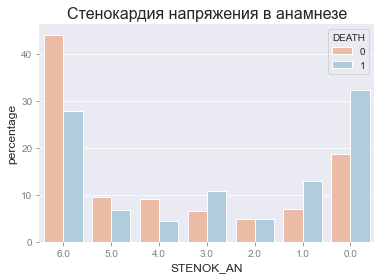

0.0    660
6.0    326
1.0    145
2.0    135
5.0    124
3.0    114
4.0     76
Name: STENOK_AN, dtype: int64


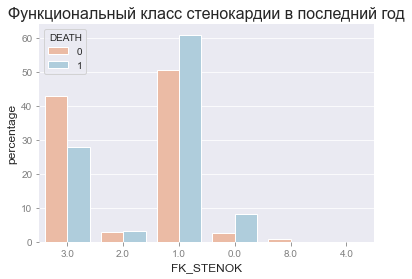

2.0    839
0.0    660
3.0     54
1.0     47
4.0     10
8.0      1
Name: FK_STENOK, dtype: int64


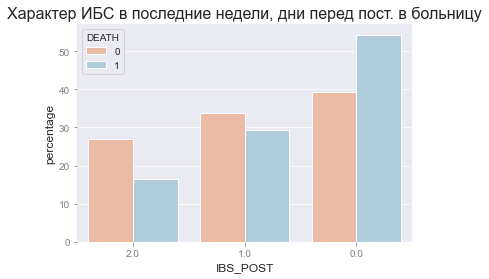

2.0    675
1.0    542
0.0    416
Name: IBS_POST, dtype: int64


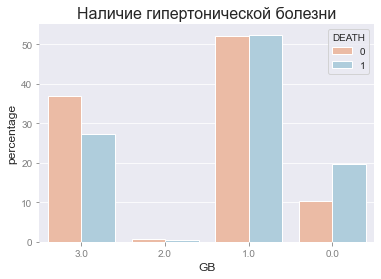

2.0    868
0.0    592
3.0    194
1.0     11
Name: GB, dtype: int64


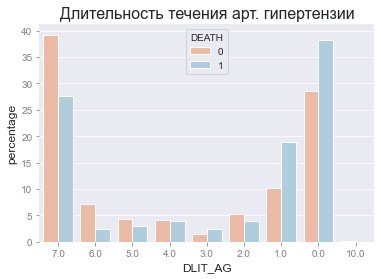

0.0     539
7.0     429
6.0     164
1.0      93
5.0      72
3.0      58
2.0      58
4.0      22
10.0      1
Name: DLIT_AG, dtype: int64


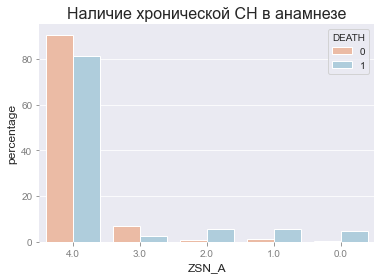

0.0    1455
1.0     103
3.0      29
2.0      24
4.0      16
Name: ZSN_A, dtype: int64


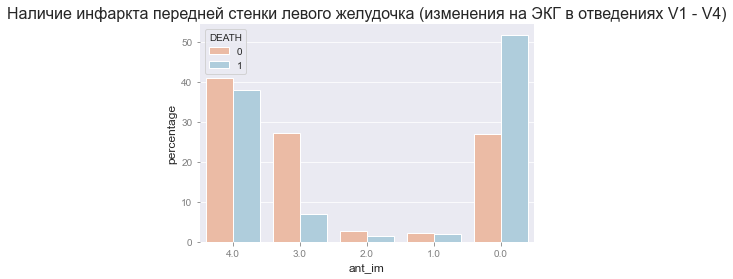

0.0    649
4.0    483
1.0    391
2.0     39
3.0     34
Name: ant_im, dtype: int64


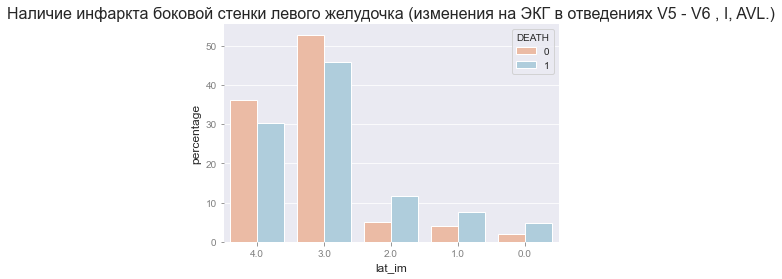

1.0    829
0.0    565
2.0     96
3.0     72
4.0     37
Name: lat_im, dtype: int64


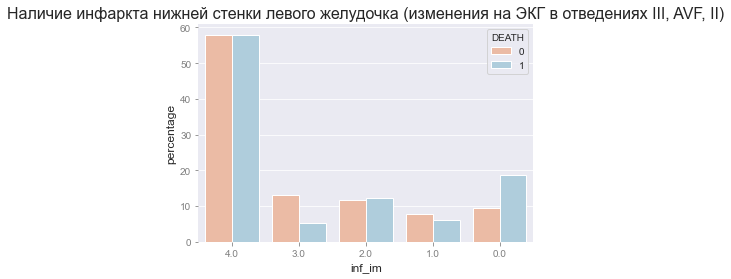

0.0    928
1.0    194
2.0    187
4.0    171
3.0    121
Name: inf_im, dtype: int64


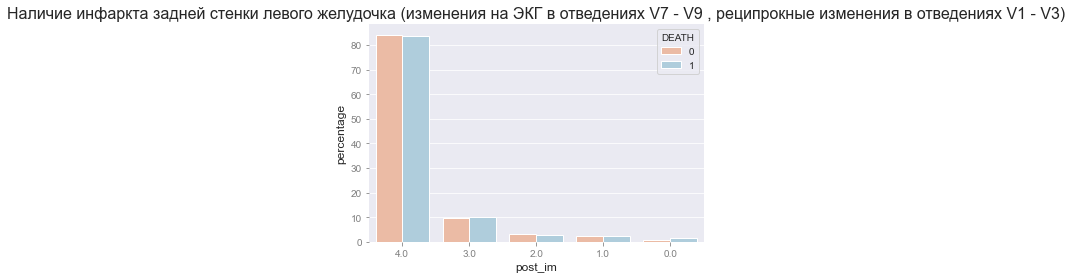

0.0    1351
1.0     155
2.0      51
3.0      35
4.0      14
Name: post_im, dtype: int64


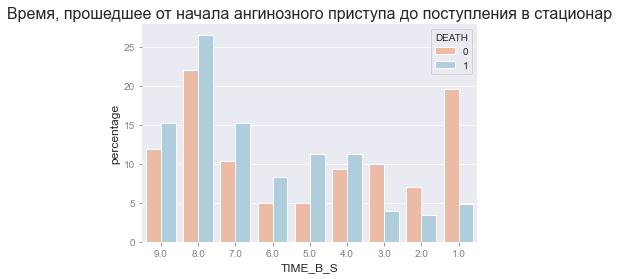

2.0    350
9.0    269
1.0    192
3.0    172
6.0    148
7.0    141
8.0    100
5.0     91
4.0     84
Name: TIME_B_S, dtype: int64


In [121]:
for cat_feature in cat_features:
    bar_plot(dataframe, cat_feature, dict_params[cat_feature], 'DEATH')
    print(dataframe[cat_feature].value_counts())

# Preprocessing

In [122]:
dataset = dataframe.copy(deep=True)

In [123]:
drop_targets = list((Counter(target_columns) - Counter(['DEATH'])).elements())

In [124]:
dataset.drop('ID', axis='columns', inplace=True)
dataset.drop(drop_targets, axis='columns', inplace=True)

In [125]:
columns = list((Counter(dataset.columns) & Counter(zero_day) | Counter(['DEATH'])).elements())
dataset = dataset[columns]

In [126]:
features = list((Counter(list(dataset.columns)) - Counter(['DEATH'])).elements())

In [127]:
category_cols = list((Counter(features) - Counter(binary_features) - Counter(numeric_features) & Counter(zero_day)).elements())

# Correlation

In [131]:
corr_matrix = identify_collinear(dataset, 0.4, method='spearman')
corr_matrix.sort_values('corr_value').head(50)

16 features with a correlation magnitude greater than 0.40.



,drop_feature,corr_feature,corr_value
19,K_BLOOD,GIPO_K,-0.841927
11,ritm_ecg_p_07,ritm_ecg_p_01,-0.770882
6,inf_im,ant_im,-0.734461
7,inf_im,lat_im,-0.556949
8,post_im,ant_im,-0.431015
0,SEX,AGE,-0.404188
4,MP_TP_POST,nr_04,0.465691
15,n_r_ecg_p_06,MP_TP_POST,0.481841
9,ritm_ecg_p_02,nr_04,0.504271
20,AST_BLOOD,ALT_BLOOD,0.523553


In [132]:
corr_matrix = identify_collinear(dataset, 0.4, method='kendall')
corr_matrix.sort_values('corr_value')

14 features with a correlation magnitude greater than 0.40.



,drop_feature,corr_feature,corr_value
9,ritm_ecg_p_07,ritm_ecg_p_01,-0.770882
17,K_BLOOD,GIPO_K,-0.701765
5,inf_im,ant_im,-0.639435
6,inf_im,lat_im,-0.494938
18,AST_BLOOD,ALT_BLOOD,0.406960
3,MP_TP_POST,nr_04,0.465691
13,n_r_ecg_p_06,MP_TP_POST,0.481841
7,ritm_ecg_p_02,nr_04,0.504271
14,n_r_ecg_p_06,ritm_ecg_p_02,0.542348
15,n_r_ecg_p_08,SVT_POST,0.565540
